## Housekeeping

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, mean_squared_error
from sklearn import datasets
from sklearn import svm
import math


## Preamble - Data Cleaning

To clean our data, we have reused some of the code we had employed earlier on in the course. We first concatenate these files in the below cell block, and run this file through our scrubber which is where we handle our data cleaning. For further details, you can review the scrubber notebook.

In [2]:
#Combining the two datasets and saving as a new csv
df1 = pd.read_csv('covid19-cdc-22207000.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)
df2 = pd.read_csv('covid19-cdc-12468998.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)

combined_df = pd.concat([df1, df2])

combined_df.to_csv('covid19-cdc-combined-22207000-12468998.csv', index=False)

print(len(combined_df))

40000


The product of this scrubber is <b>finalised-covid19-cdc-combined-22207000-12468998.csv</b>. We will create our train/test dataframes from this csv file.

In [3]:
#Reading the post-scrubbed CSV and checking length
df = pd.read_csv('finalised-covid19-cdc-combined-22207000-12468998.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)

print(len(df))

35465


# Task 1

# 1.1 Train/Test Split

With the data cleaning taken care of, we can now conduct a train text split on the data to prepare it for future machine learning tasks. Once the data is split, we can plot the train frame and investigate the relationships between the features.

In [4]:
#data for task 1
df = pd.read_csv('finalised-covid19-cdc-combined-22207000-12468998.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)

#train test split on data
train, test = train_test_split(df, test_size = 0.3, random_state=42)

In [5]:
df.duplicated().sum()

6510

In [6]:
train.shape

(24825, 15)

In [7]:
test.shape

(10640, 15)

# 1.2 Mapping our Training Set

## Correlation Between Continuous Features

Correlation:  -0.007275520256231975
Weak positive correlation between these two variables.


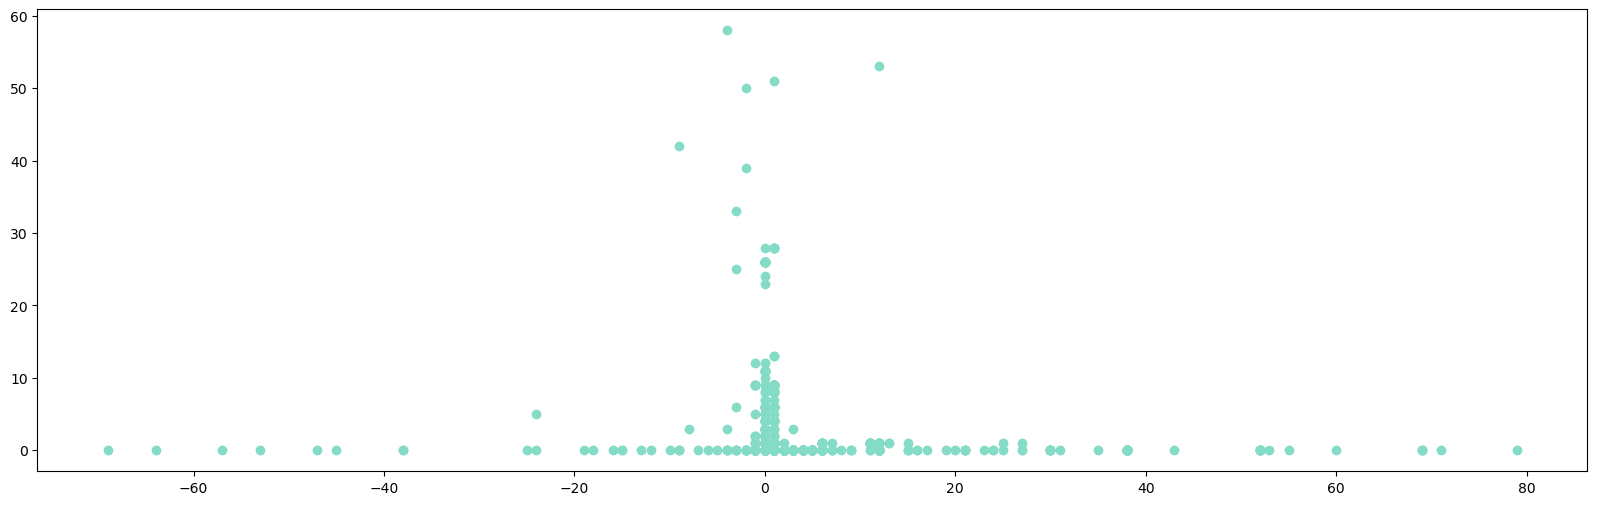

In [8]:
fig, axs = plt.subplots(figsize=(20, 6), ncols=1, nrows=1)

plt.scatter(train['case_positive_specimen_interval'], train['case_onset_interval'], c='#84dcc6')
corr = train['case_onset_interval'].corr(train['case_positive_specimen_interval'])
print('Correlation: ', corr)
print('Weak positive correlation between these two variables.')
plt.show()


## Continuous Features Plotted Against Death

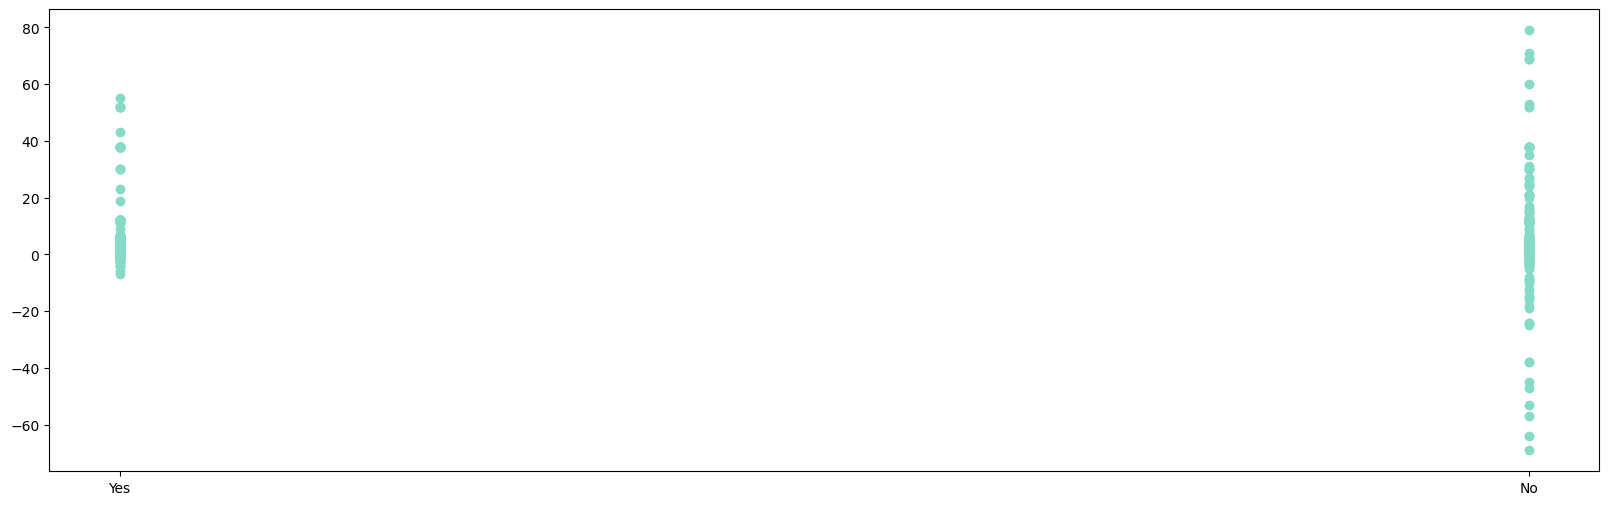

In [9]:
fig, axs = plt.subplots(figsize=(20, 6), ncols=1, nrows=1)
plt.scatter(train['death_yn'], train['case_positive_specimen_interval'], c='#84dcc6')
plt.show()

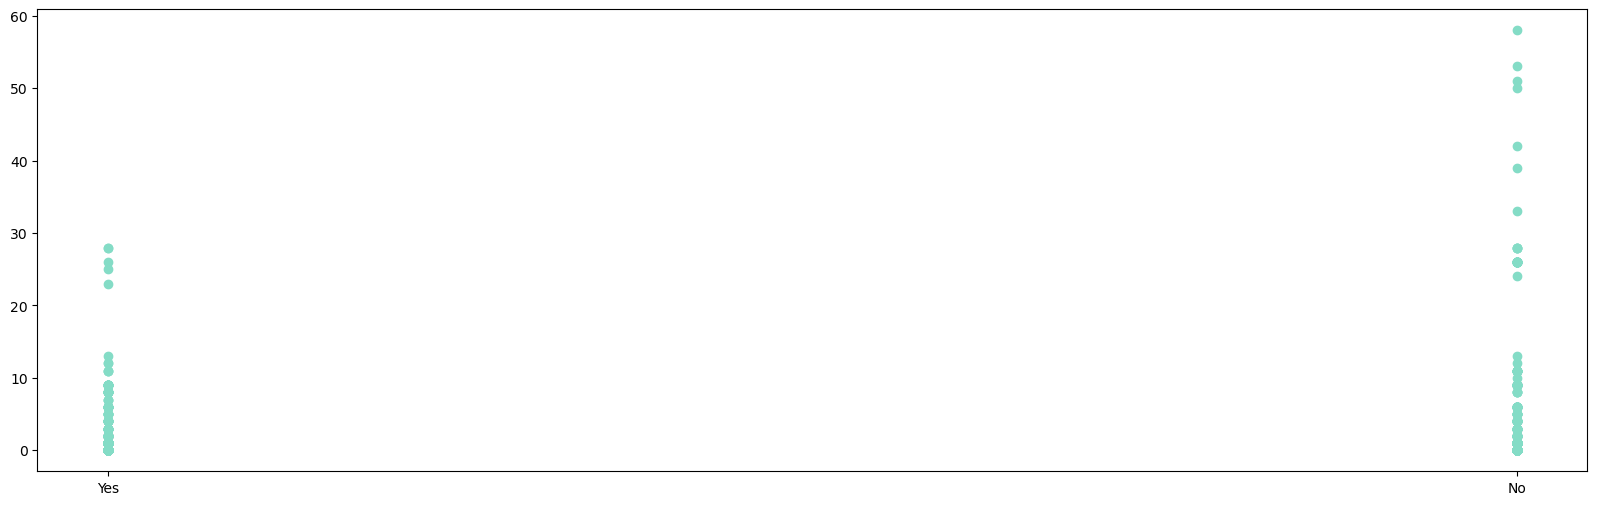

In [10]:
fig, axs = plt.subplots(figsize=(20, 6), ncols=1, nrows=1)
plt.scatter(train['death_yn'], train['case_onset_interval'], c='#84dcc6')
plt.show()

## Health Related Categorical Features Plotted Against Death

Here we are looking discern patterns from our dataset by plotting deaths (yes/no) against a select number of categorical features. The features we are going to examine first are those that relate to the health profile of our patients:

1. When the patient contracted COVID.
2. What US state the patient was in when they were reported of having COVID.
3. What age group the patient belongs to.
4. Whether the patient knew if they were exposed to COVID.
5. Whether or not the patient was hospitalised or not.
6. Whether or not the patient was taken to ICU.
7. And whether or not the patient exhibited underlying conditions which could exacerbate COVID.

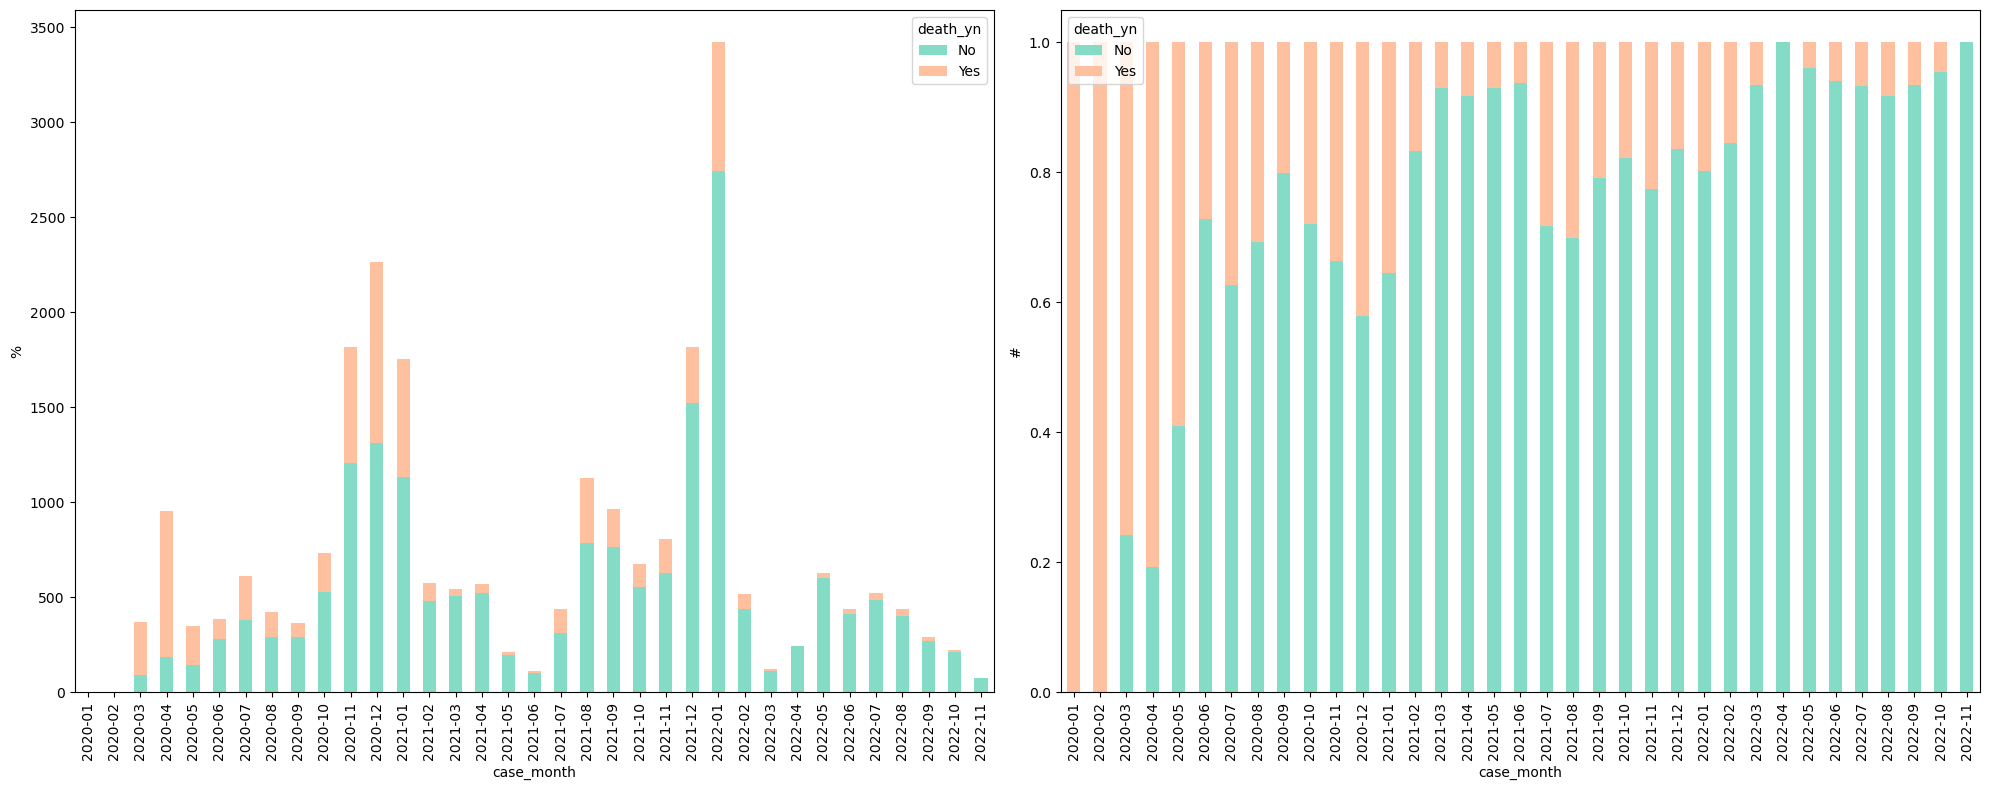

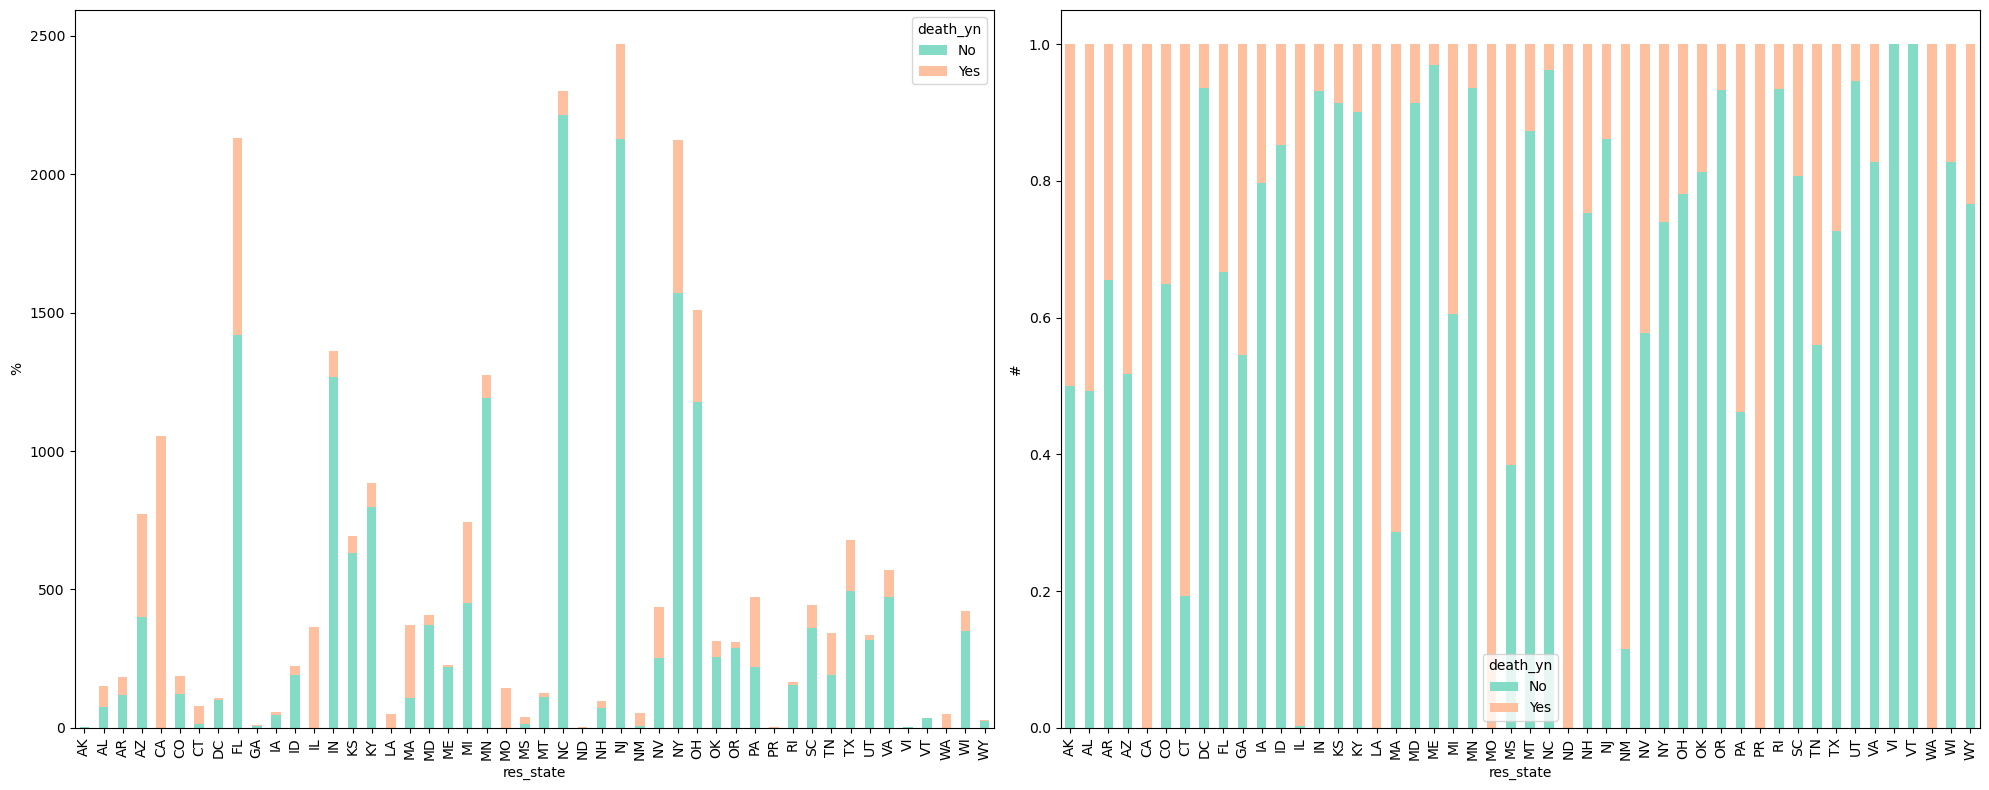

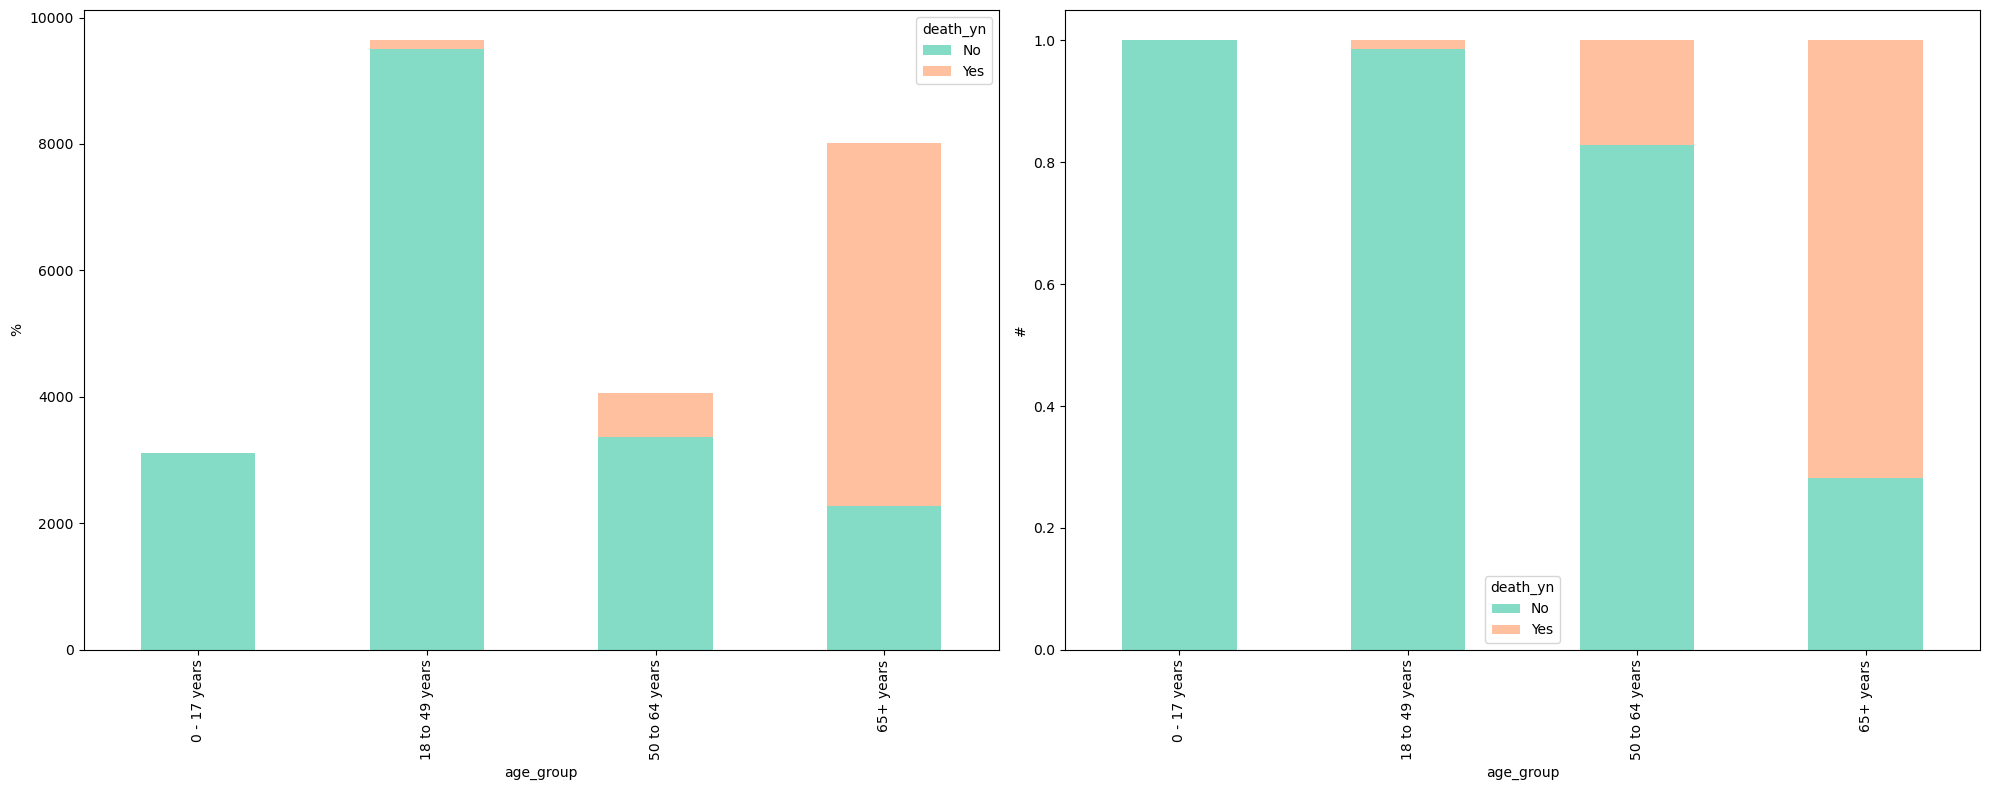

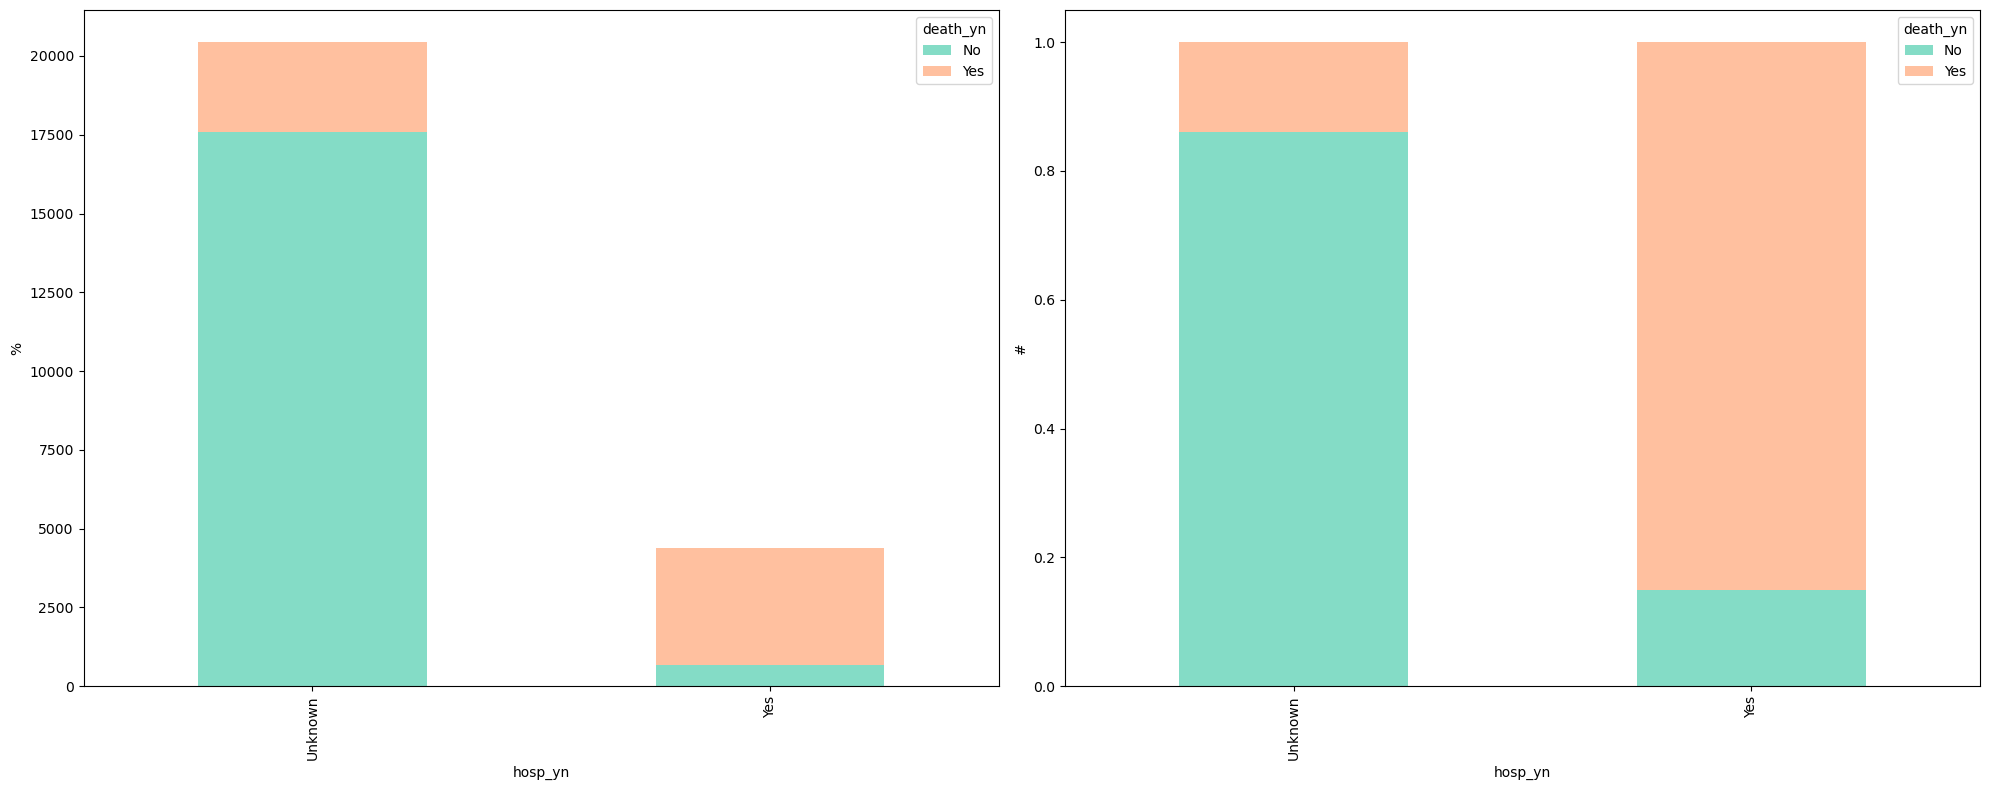

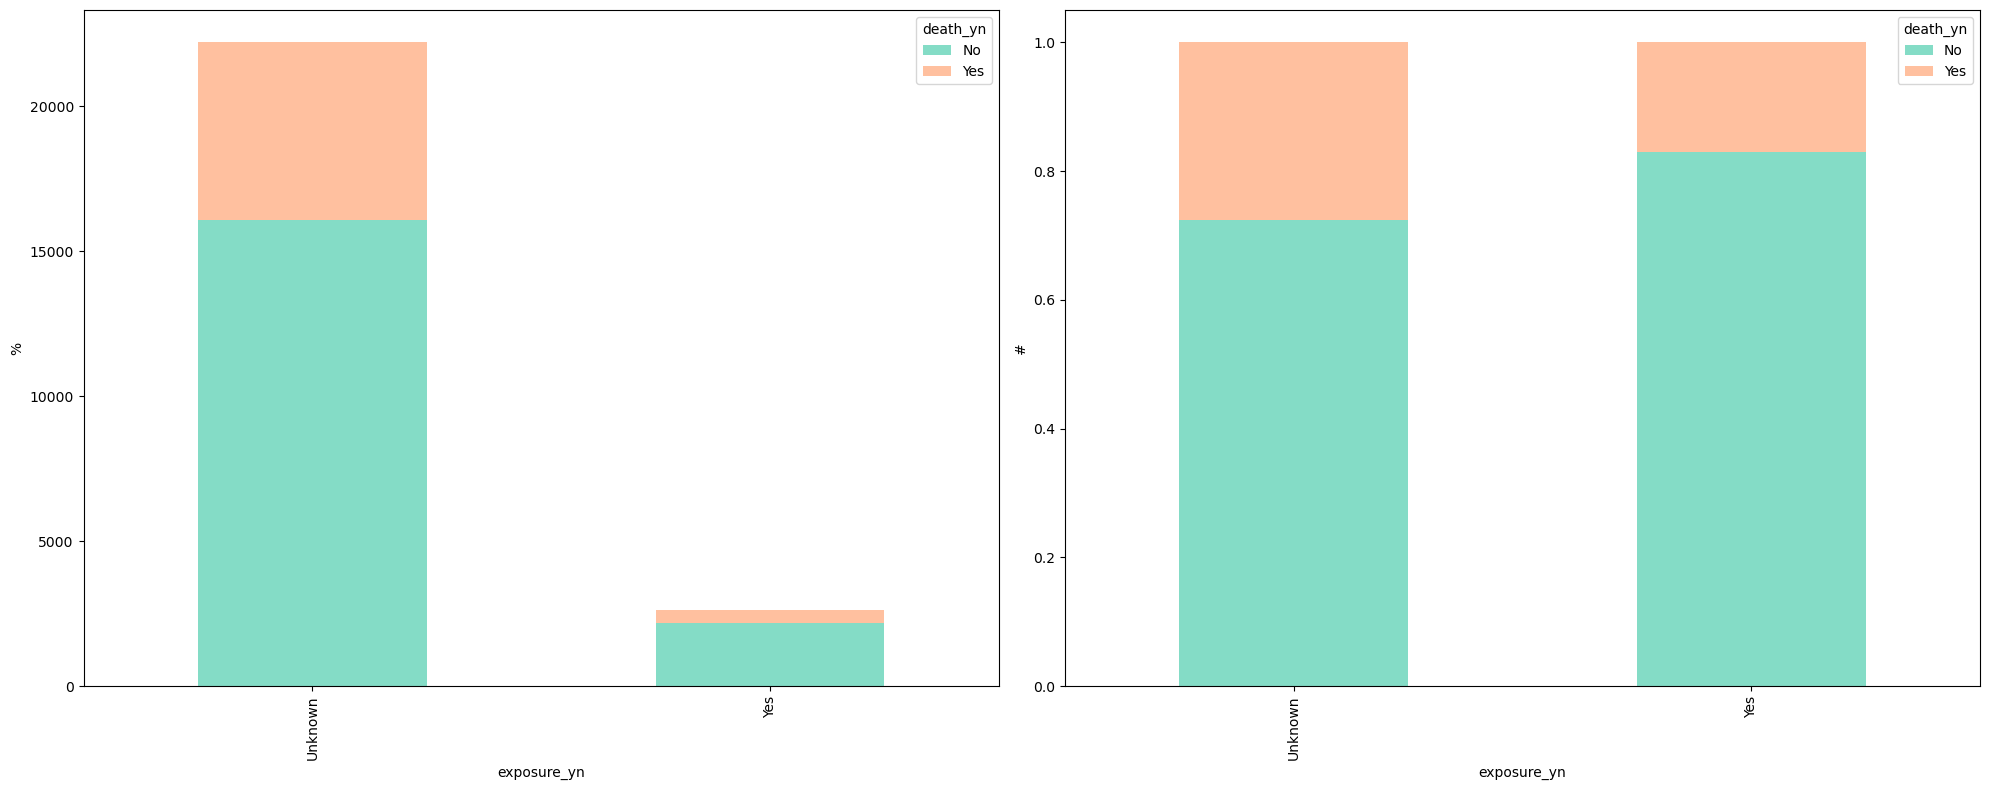

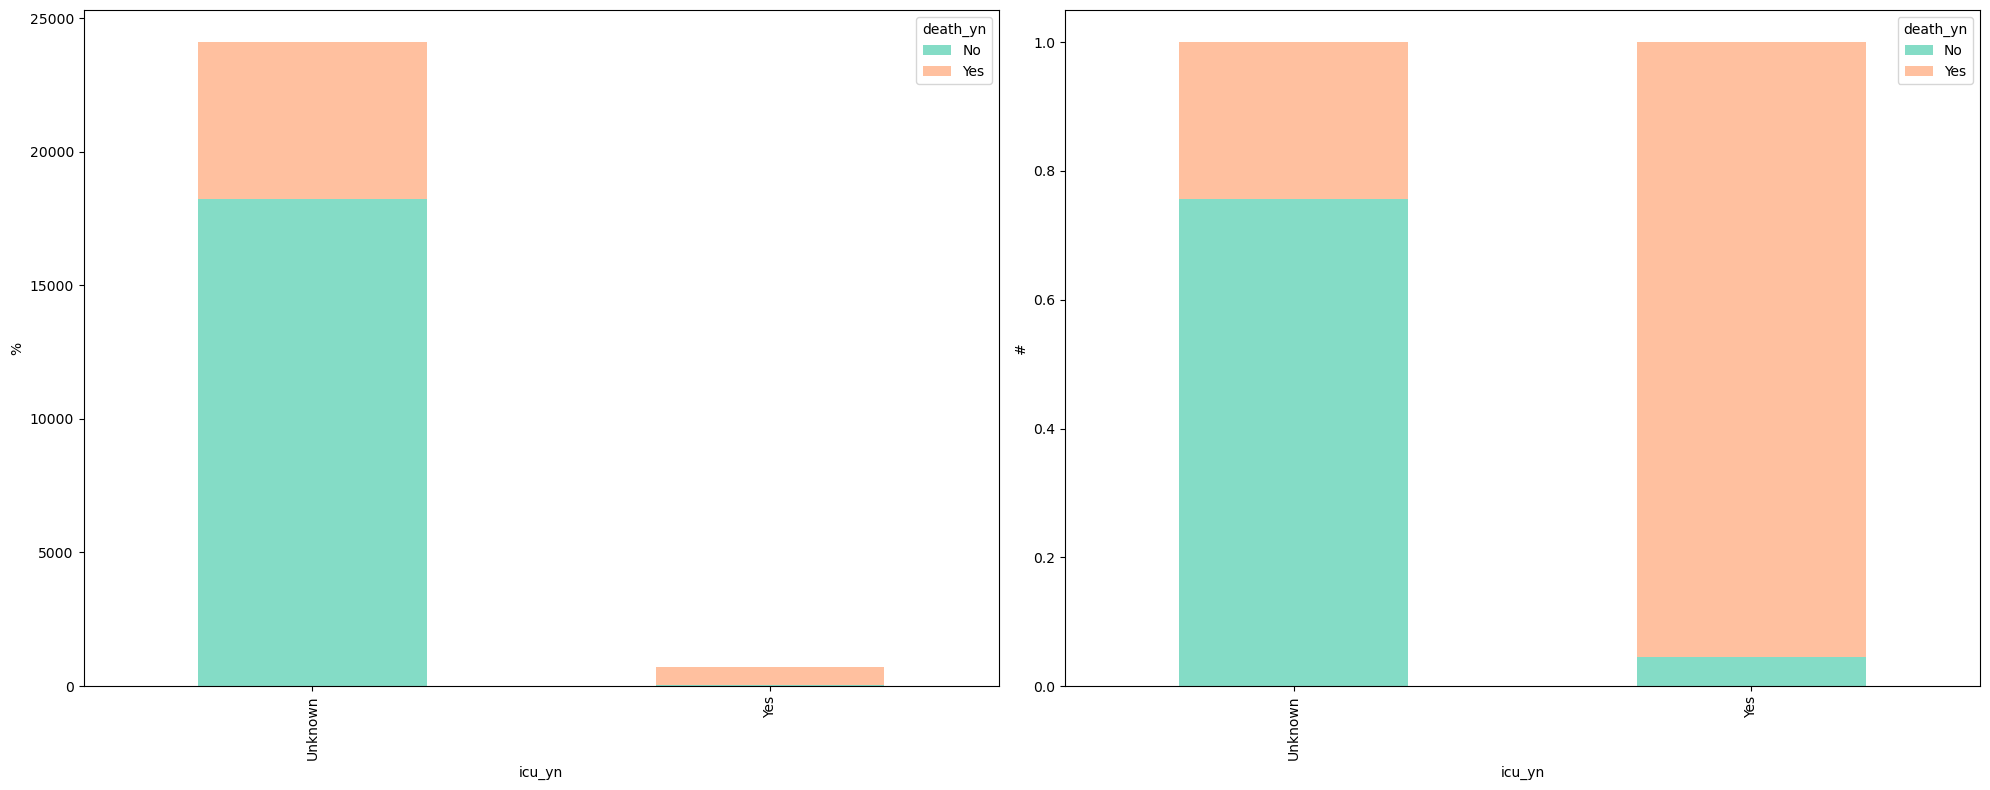

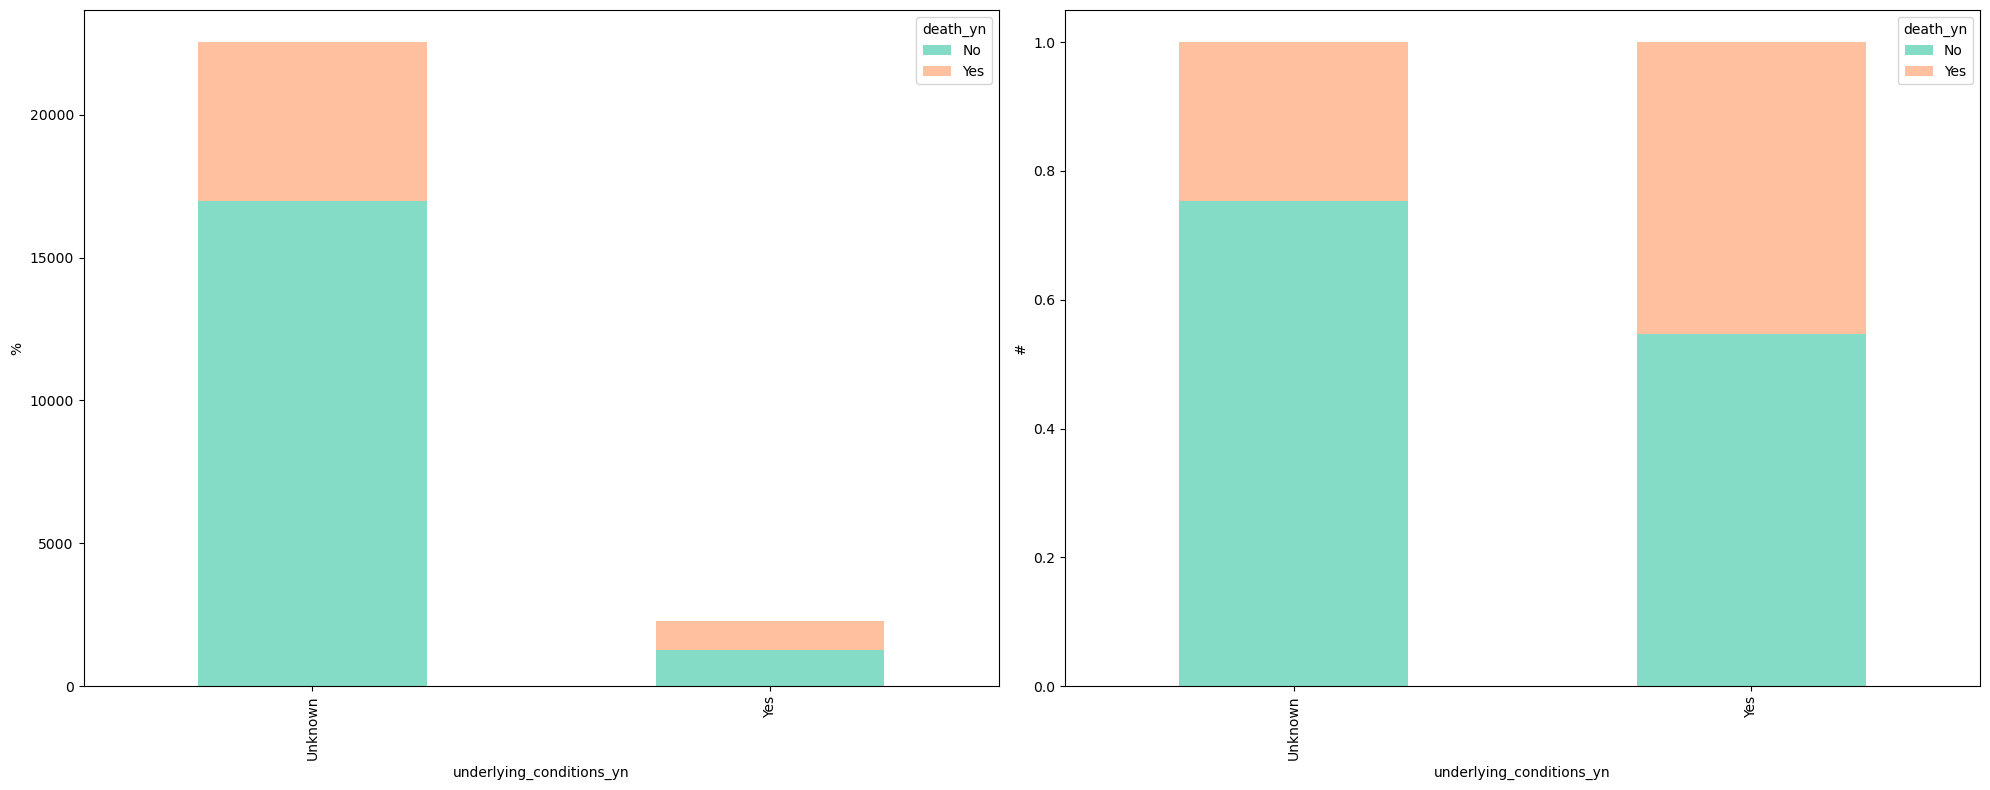

In [11]:
target_feature = train['death_yn']
select_features = [train['case_month'], train['res_state'], train['age_group'], train['hosp_yn'], train['exposure_yn'], train['icu_yn'], train['underlying_conditions_yn']]

colours = ['#84dcc6', '#ffc09f']

for feature in select_features:
  
    fig, axs = plt.subplots(ncols=2, figsize=(20, 8))
    train.groupby([feature, target_feature]).size().unstack().plot(kind='bar', stacked=True, ax=axs[0], color=colours)
    axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90, fontsize=10)
    axs[0].set_ylabel('%')

    train.groupby([feature, target_feature]).size().unstack().apply(lambda x: x/x.sum(), axis=1).plot(kind='bar', stacked=True, ax=axs[1], color=colours)
    axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90, fontsize=10)
    axs[1].set_ylabel('#')
    
    plt.tight_layout()
    plt.show()

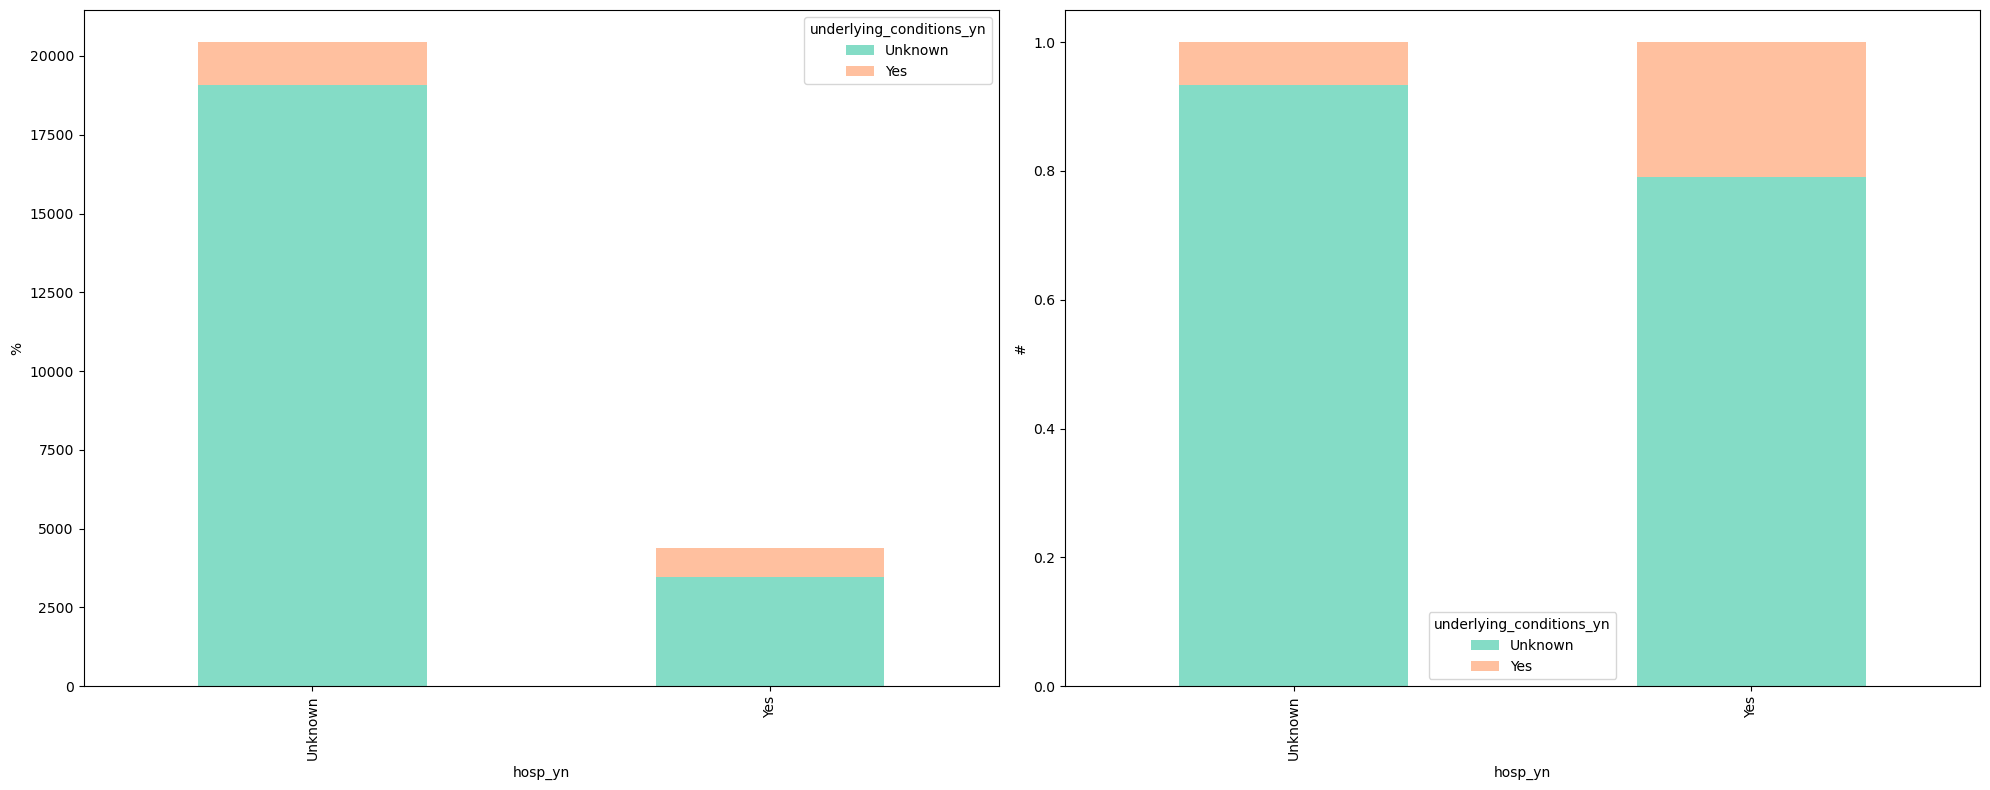

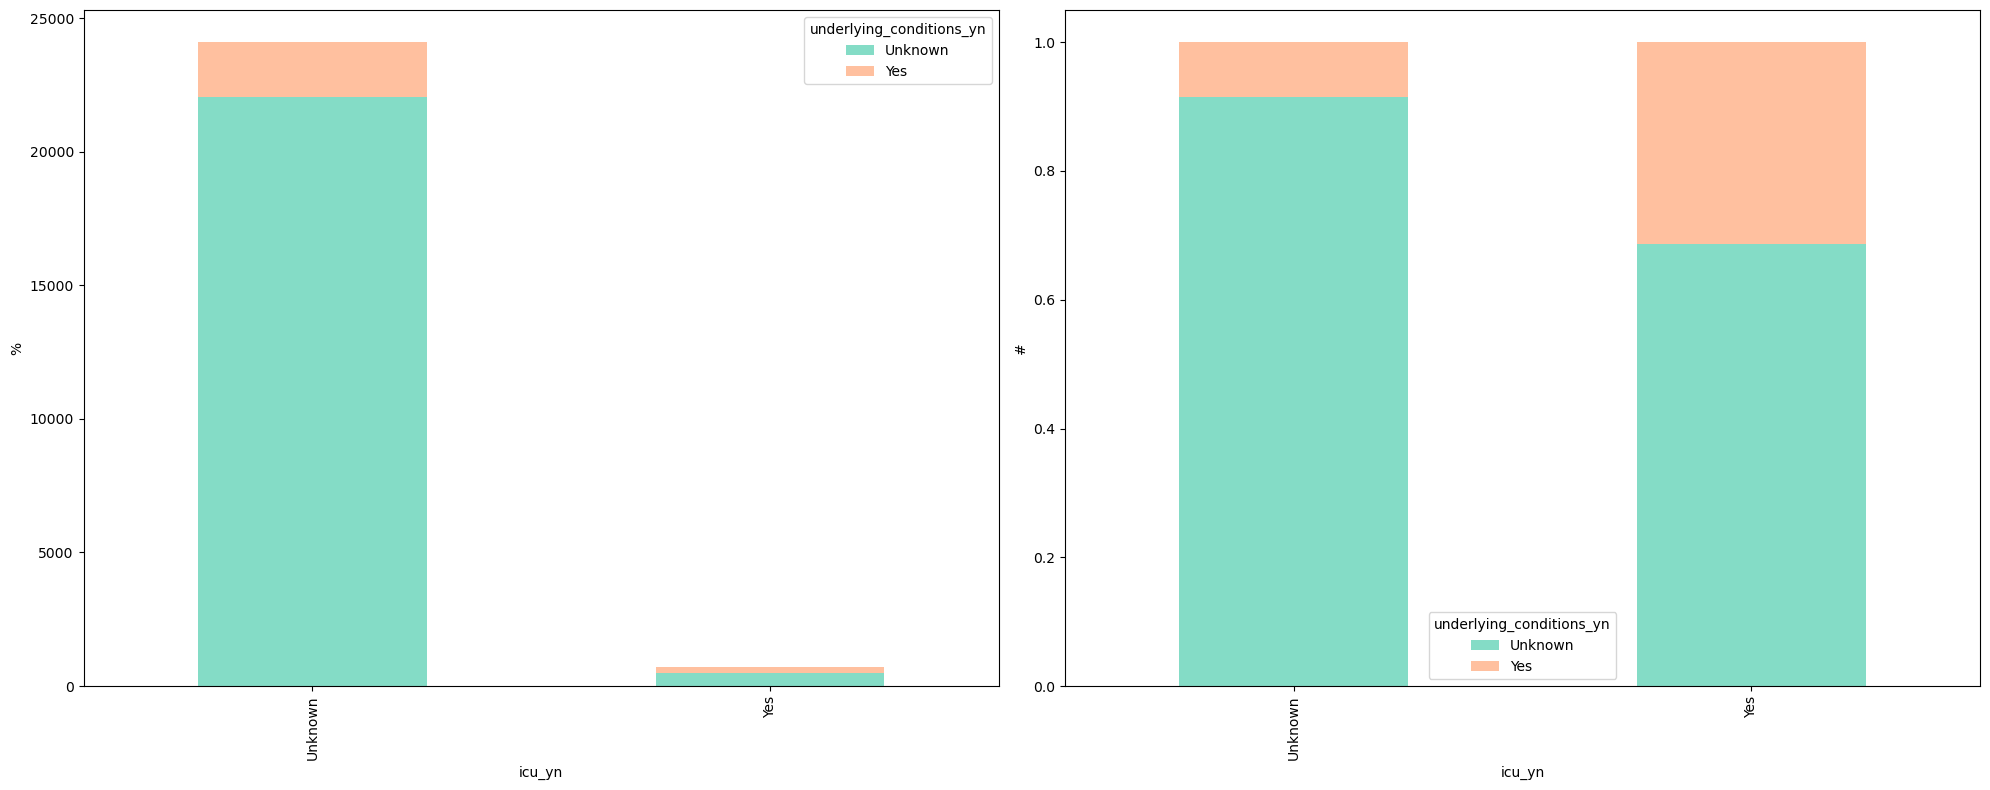

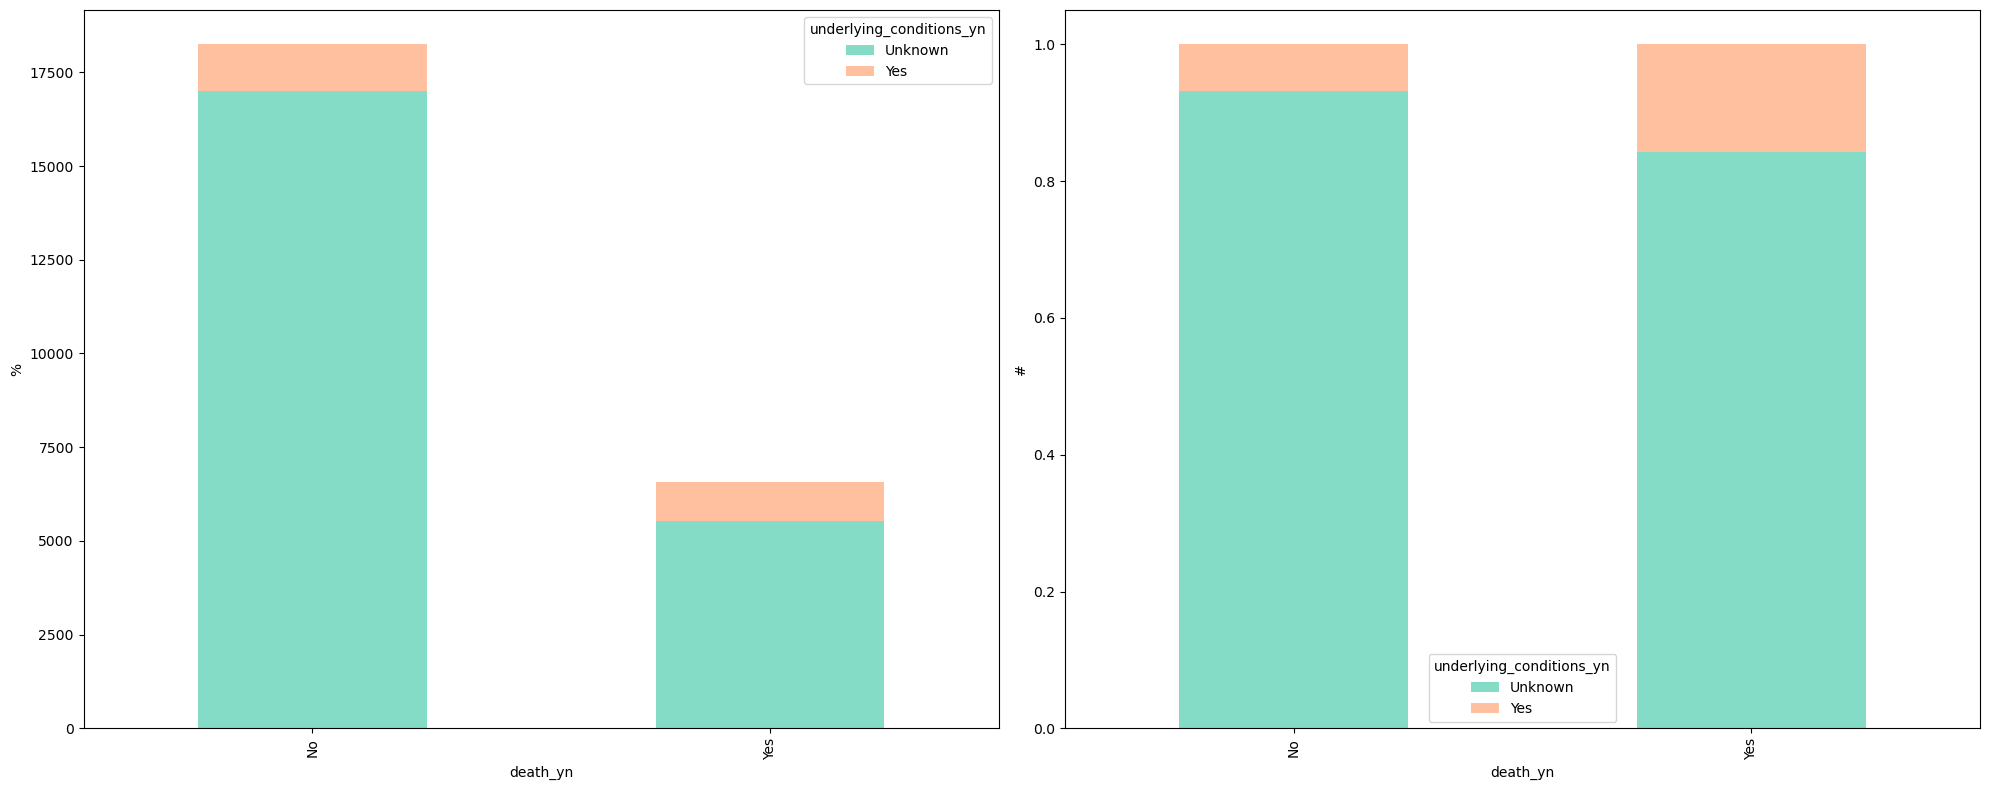

In [12]:
target_feature = train['underlying_conditions_yn']
select_features = [train['hosp_yn'], train['icu_yn'], train['death_yn']]

colours = ['#84dcc6', '#ffc09f']

for feature in select_features:
  
    fig, axs = plt.subplots(ncols=2, figsize=(20, 8))
    train.groupby([feature, target_feature]).size().unstack().plot(kind='bar', stacked=True, ax=axs[0], color=colours)
    axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90, fontsize=10)
    axs[0].set_ylabel('%')

    train.groupby([feature, target_feature]).size().unstack().apply(lambda x: x/x.sum(), axis=1).plot(kind='bar', stacked=True, ax=axs[1], color=colours)
    axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90, fontsize=10)
    axs[1].set_ylabel('#')
    
    plt.tight_layout()
    plt.show()

## Sociological Related Categorical Features Plotted Against Death

Here we are looking discern patterns from our dataset by plotting deaths (yes/no) against a number of sociological features: race, ethnicity, sex.

1. The race of the patient.
2. The ethnicity of the patient.
3. The sex of the patient.

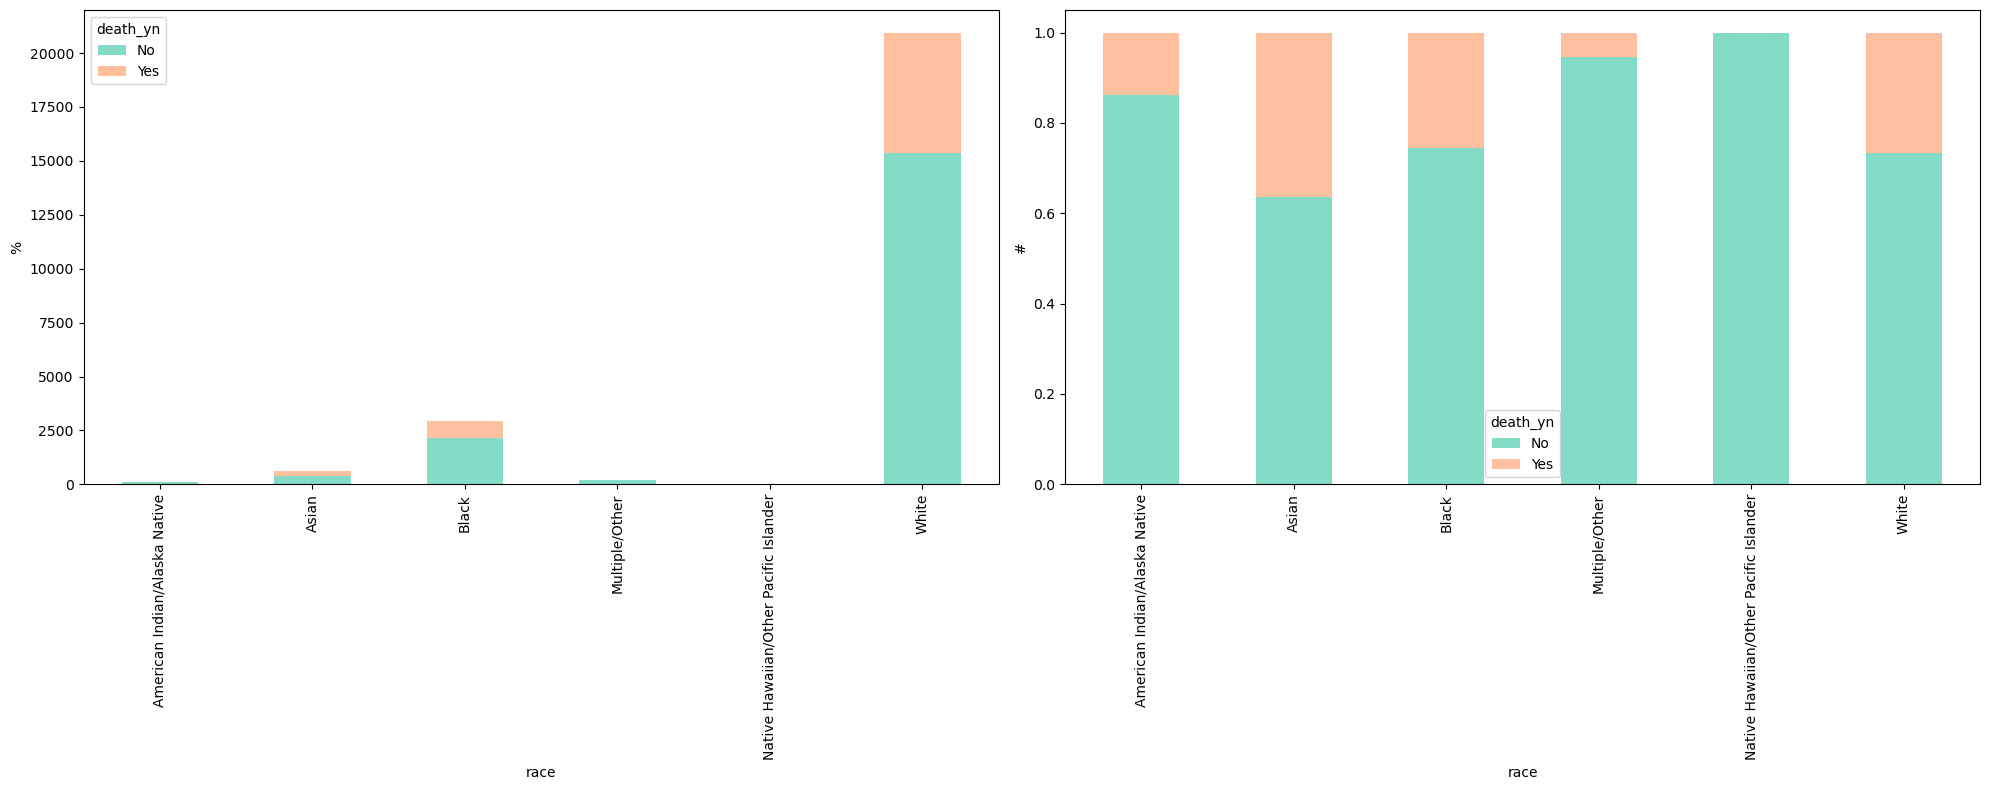

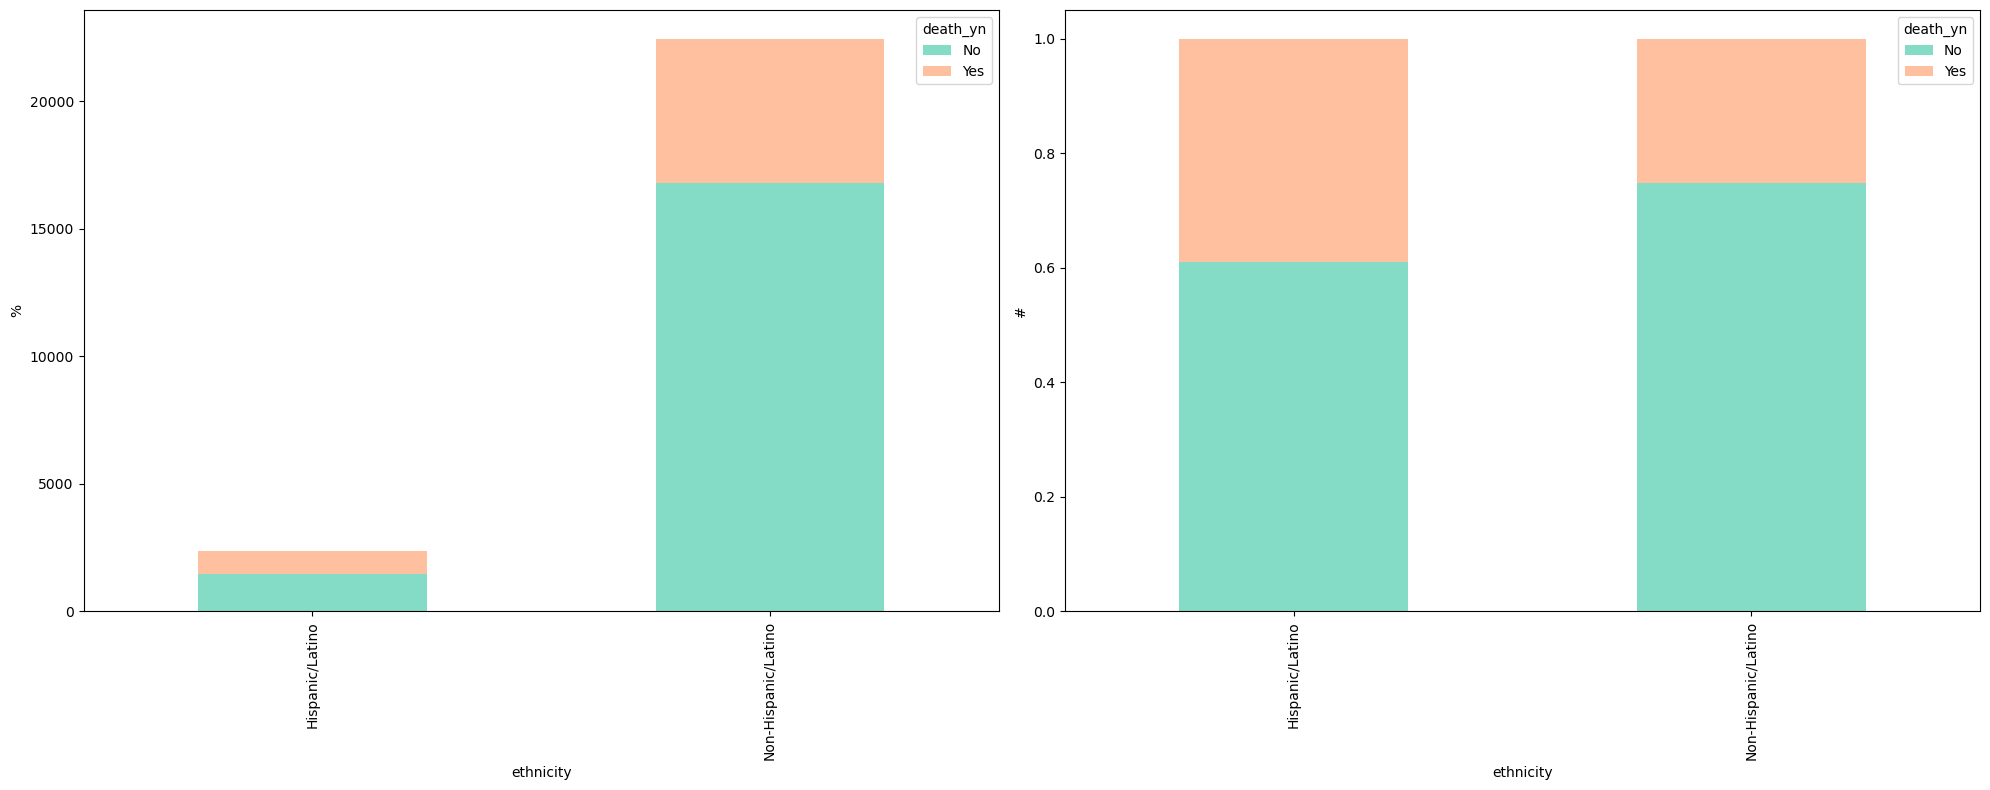

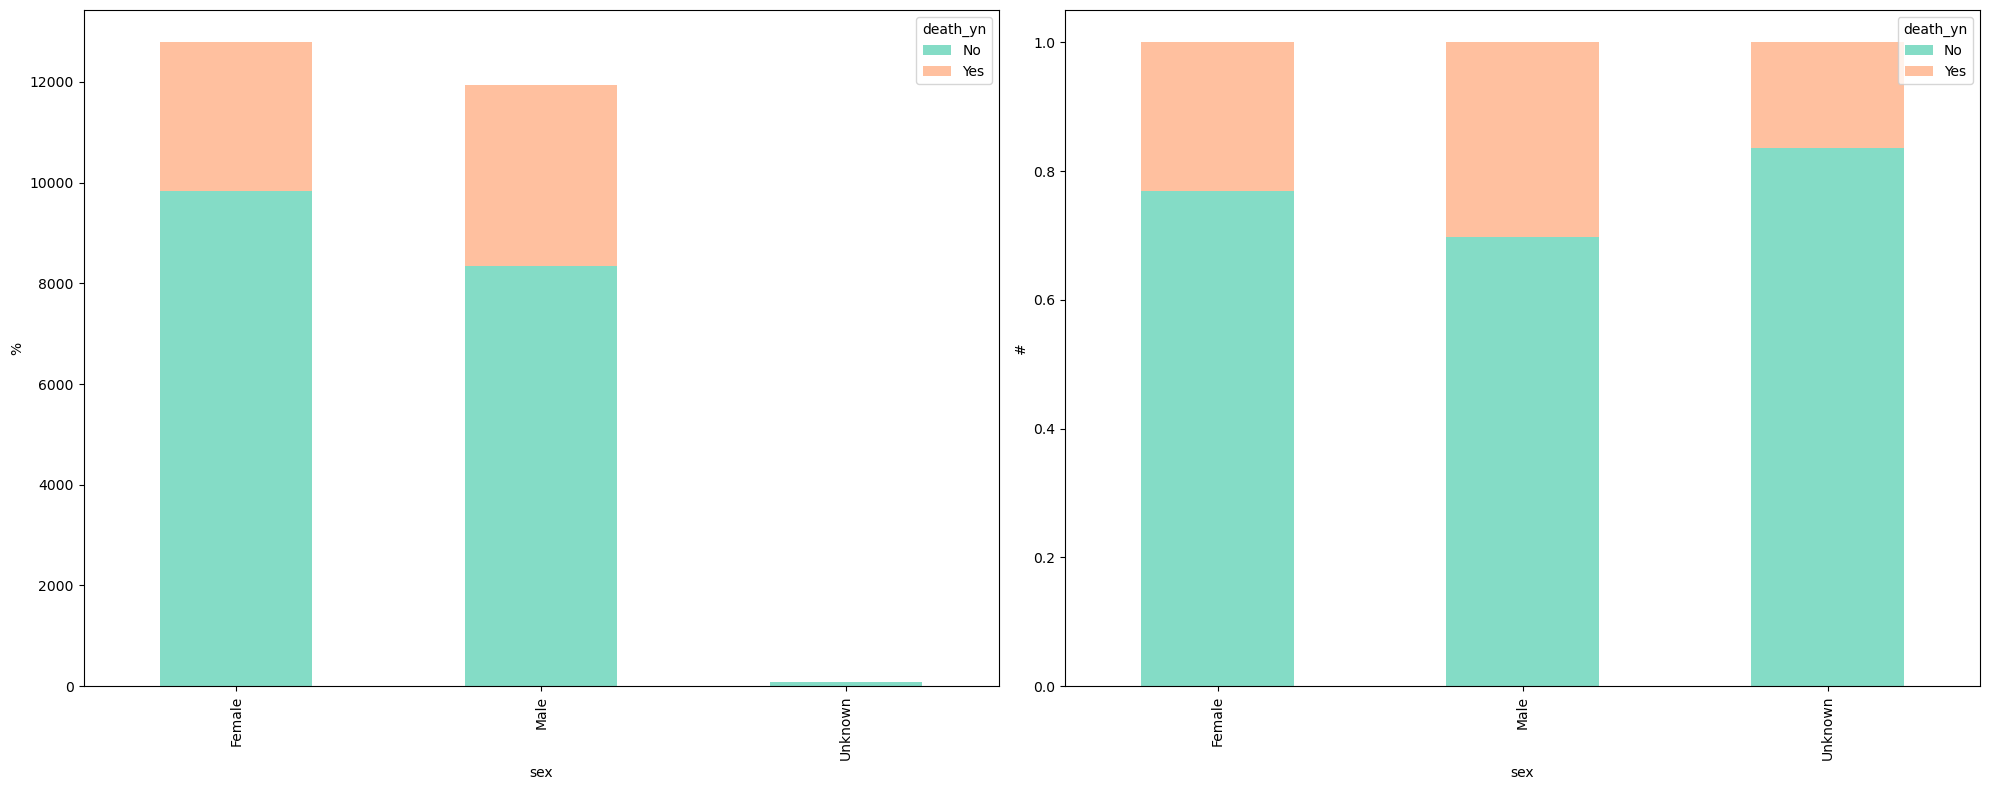

In [13]:

target_features = [train['race'], train['ethnicity'], train['sex']]
select_features = [train['death_yn']]

colours = ['#84dcc6', '#ffc09f']

for target_feature in target_features:

    for feature in select_features:

        fig, axs = plt.subplots(ncols=2, figsize=(20, 8))
        train.groupby([target_feature, feature]).size().unstack().plot(kind='bar', stacked=True, ax=axs[0], color=colours)
        axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90, fontsize=10)
        axs[0].set_ylabel('%')

        train.groupby([target_feature, feature]).size().unstack().apply(lambda x: x/x.sum(), axis=1).plot(kind='bar', stacked=True, ax=axs[1], color=colours)
        axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90, fontsize=10)
        axs[1].set_ylabel('#')
        
        plt.tight_layout()
        plt.show()

## Observations/Summary:

1. As the COVID19 pandemic progressed, we can generally observe both a reduction in the number of deaths per month and the proporption of deaths with regards the whole, month-on-month. The outlier here is January 2022. From the CDC dataset provided, we cannot discern whether or not the patient was vaccinated, however we can use the months here as a proxy for the Vaccine rollout program in the US, which began mid-December 2020 and had more or less concluded by the end of the following year. The death ratio falling against total cases broadly follows the vaccination rollout scheme, despite this information not formally recorded in our dataset.

2. The data also suggests that age is a predominant and robust factor when gauging the impact contracting COVID will have on your health. Our data shows that those who belong to the oldest age bracket (65+) and test positive for COVID are far more likely to die than those who are younger (compare 65+ against 0-17 years old). Our data also shows that those who are older are more exposed to the risk of COVID, in that the oldest age bucket leads in terms of hospitalisations, ICU admissions, and underlying conditions in comparison to the other age brackets. This aligns with what is now known about COVID-19, that older adults and those with underlying health conditions are considered to be at a higher risk of severe illness and death from COVID-19. 

3. The data also demonstrates that having underlying medical conditions increases the risk of hospitalisation, ICU admission, and death from COVID-19. And while we do not get access to the comorbidities affecting the patients in our dataset, those who reported as having underlying conditions such as diabtes, hypertension, obesity (etc.), confer a much higher risk of death from COVID-19 than others.

4. The data also shows that in the event of being admitted to hospital or the ICU, the success of making a full recovery is limited, and drasticly decreases the older you are. The data also proves the opposite whereby the younger you are the more resilient you are to COVID, leading to far fewer hospitalisation, admissions to ICU, and deaths. 

5. The data also shows that minorities, categorised in our race and ethnicity features (Black, Hispanic, Asian), are hospitalised, admitted to ICU, and die more regularly than their white counterparts pro rata. Without more granular information on our patient it is hard to say exactly what factors are driving these disparities: access to healthcare; wealth; etc.,

6. The data also demonstrates that there is a weak correlation between case_onset_intervals and case_positive_specimen_intervals, with the correlation coefficient is close to zero. This indicates that the timing of when a person experiences symptoms (case onset interval) and when they test positive for COVID-19 (case positive specimen interval) are not strongly associated with each other.

7. Our data also shows that there is a weak negative correlation between our continuous features, and when we map these continuous features against our target feature, there is no real discernible pattern that differents yes from no.


## Selected Features

Based on the above observations, the subset of features we are going to use to model the health profile of our patients are: 

i. <b>Age Group</b>, 
ii. <b>Case Month</b>, 
iii. <b>Hospilisation Status</b>, 
iv. <b>ICU Status</b>, 
v. <b>Underlying conditions</b>. 

Let's transform these features into new features with discrete values so we can use them in our models.

#### Case Month

In [14]:
month_map = {'2020-01': 0, 
             '2020-02': 1, 
             '2020-03': 2, 
             '2020-04': 3,
             '2020-05': 4,
             '2020-06': 5,
             '2020-07': 6,
             '2020-08': 7,
             '2020-09': 8,
             '2020-10': 9,
             '2020-11': 10,
             '2020-12': 11,
             '2021-01': 12,
             '2021-02': 13,
             '2021-03': 14,
             '2021-04': 15,
             '2021-05': 16,
             '2021-06': 17,
             '2021-07': 18,
             '2021-08': 19,
             '2021-09': 20,
             '2021-10': 21,
             '2021-11': 22,
             '2021-12': 23,
             '2022-01': 24,
             '2022-02': 25,
             '2022-03': 26,
             '2022-04': 27,
             '2022-05': 28,
             '2022-06': 29,
             '2022-07': 30,
             '2022-08': 31,
             '2022-09': 32,
             '2022-10': 33,
             '2022-11': 34
             }

train['case_month'] = train['case_month'].map(month_map)
test['case_month'] = test['case_month'].map(month_map)

#### Age Group

In [15]:
age_map = {'0 - 17 years': 0, 
           '18 to 49 years': 1, 
           '50 to 64 years': 2, 
           '65+ years': 3
           }

train['age_group'] = train['age_group'].map(age_map)
test['age_group'] = test['age_group'].map(age_map)

#### Hospitalisation 

In [16]:
hosp_map = { 'Unknown': 0, 
            'Yes': 1, 
            }

train['hosp_yn'] = train['hosp_yn'].map(hosp_map)
test['hosp_yn'] = test['hosp_yn'].map(hosp_map)

#### ICU 

In [17]:
icu_map = {'Unknown': 0, 
            'Yes': 1, 
            }

train['icu_yn'] = train['icu_yn'].map(icu_map)
test['icu_yn'] = test['icu_yn'].map(icu_map)

#### Underlying Conditions

In [18]:
underlying_map = {'Unknown': 0, 
                  'Yes': 1, 
                }

train['underlying_conditions_yn'] = train['underlying_conditions_yn'].map(underlying_map)
test['underlying_conditions_yn'] = test['underlying_conditions_yn'].map(underlying_map)

In [19]:
# train['definite_underlying'] = (train['underlying_conditions_yn'] == 1).astype(int)
# train['uncertain_underlying'] = (train['underlying_conditions_yn'] == 0).astype(int)

# test['definite_underlying'] = (test['underlying_conditions_yn'] == 1).astype(int)
# test['uncertain_underlying'] = (test['underlying_conditions_yn'] == 0).astype(int)

#### Death

In [20]:
death_map = {'No': 0,
             'Yes': 1,
             }

train['death_yn'] = train['death_yn'].map(death_map)
test['death_yn'] = test['death_yn'].map(death_map)

# Task 2: Linear Regression

The aim of this task is to perform some basic predictive analysis on the data prepared in task one. To this end, a linear regression model will be created using the training data yielded by the train-test split from the previous task. The features to be analyzed in this section are:

i. <b>age</b>, 
ii. <b>case month</b>, 
iii. <b>hospilisation status</b>, 
iv. <b>ICU status</b>, 
v. <b>underlying conditions</b>. 

 The model will then be evaluated based on its performance using the training data, the test data, and other linear regression models trained on the full dataset. 

## 2.1

In [21]:
linear_regression_x_train = train[['case_month', 'age_group', 'hosp_yn', 'icu_yn', 'underlying_conditions_yn']]
linear_regression_y_train = train['death_yn']

linear_regression_x_test = test[['case_month', 'age_group', 'hosp_yn', 'icu_yn', 'underlying_conditions_yn']]
linear_regression_y_test = test['death_yn']

In [22]:
lr = LinearRegression()
lr.fit(linear_regression_x_train, linear_regression_y_train)
linear_regression_y_pred = lr.predict(linear_regression_x_train)

## 2.2

In [23]:
for feature, coef in zip(linear_regression_x_train.columns, lr.coef_):
    print(feature, ':', coef)

case_month : -0.006671027476552163
age_group : 0.1986398880686217
hosp_yn : 0.4135647729742001
icu_yn : 0.14741467590948512
underlying_conditions_yn : -0.0568067688753867


Underlying health conditions: this finding may be counterintuitive, as individuals with underlying health conditions are often thought to be at higher risk for adverse outcomes such as hospitalization or death from COVID-19. However, it is important to remember that the coefficient represents the association between the predictor variable and the target outcome after accounting for the effects of other predictor variables in the model.

In this case, it is possible that other predictor variables, such as age or hospitalization status, may be more strongly associated with the target outcome than underlying health condition, and that the effect of underlying health condition on the target outcome is actually negative when these other factors are taken into account. Therefore, the negative coefficient for "definite_underlying" suggests that the presence of a definite underlying health condition alone may not be a strong predictor of the target outcome in this model.

## 2.3

In [24]:
# predict target feature values for first 10 training examples
linear_regression_y_train_pred_10 = lr.predict(linear_regression_x_train[:10])
print("Predicted target feature values for first 10 training examples:\n", linear_regression_y_train_pred_10)
print()
# threshold predicted target feature values to get predicted classes
linear_regression_y_train_pred_class_10 = (lr.predict(linear_regression_x_train[:10]) > 0.5).astype(int)
print("Predicted class for first 10 training examples:\n", linear_regression_y_train_pred_class_10)

Predicted target feature values for first 10 training examples:
 [ 0.20900546  0.85456526 -0.0464412   0.9613017  -0.06152479  0.0904179
  0.48425913 -0.15491918 -0.01975709  0.85456526]

Predicted class for first 10 training examples:
 [0 1 0 1 0 0 0 0 0 1]


In [25]:
# evaluate model on full training set
linear_regression_y_train_pred = lr.predict(linear_regression_x_train)

linear_regression_y_train_pred_class = (linear_regression_y_train_pred > 0.5).astype(int)

linear_regression_accuracy_train = accuracy_score(linear_regression_y_train, linear_regression_y_train_pred_class)
linear_regression_confusion_train = confusion_matrix(linear_regression_y_train, linear_regression_y_train_pred_class)
linear_regression_precision_train = precision_score(linear_regression_y_train, linear_regression_y_train_pred_class)
linear_regression_recall_train = recall_score(linear_regression_y_train, linear_regression_y_train_pred_class)
linear_regression_f1_train = f1_score(linear_regression_y_train, linear_regression_y_train_pred_class)
linear_regression_mse = mean_squared_error(linear_regression_y_train, linear_regression_y_train_pred_class)
linear_regression_r2 = r2_score(linear_regression_y_train, linear_regression_y_train_pred_class)

print("\nEvaluation metrics on the training set:")
print()
print("Accuracy: {:.2f}".format(linear_regression_accuracy_train))
print("Confusion matrix:\n", linear_regression_confusion_train)
print("Precision: {:.2f}".format(linear_regression_precision_train))
print("Recall: {:.2f}".format(linear_regression_recall_train))
print("F1 score: {:.2f}".format(linear_regression_f1_train))
print("MSE: {:.2f}".format(linear_regression_mse))
print("R^2: {:.2f}".format(linear_regression_r2))


Evaluation metrics on the training set:

Accuracy: 0.89
Confusion matrix:
 [[17437   811]
 [ 1992  4585]]
Precision: 0.85
Recall: 0.70
F1 score: 0.77
MSE: 0.11
R^2: 0.42


In [26]:
# make predictions on the training set and evaluate the model performance
linear_regression_y_train_pred = lr.predict(linear_regression_x_train)
linear_regression_mae_train = mean_absolute_error(linear_regression_y_train, linear_regression_y_train_pred)
linear_regression_mse_train = mean_squared_error(linear_regression_y_train, linear_regression_y_train_pred)
linear_regression_rmse_train = np.sqrt(linear_regression_mse_train)
linear_regression_r2_train = r2_score(linear_regression_y_train, linear_regression_y_train_pred)

print("Evaluation metrics on the training set:")
print()
print("Mean Absolute Error: {:.2f}".format(linear_regression_mae_train))
print("Mean Squared Error: {:.2f}".format(linear_regression_mse_train))
print("Root Mean Squared Error: {:.2f}".format(linear_regression_rmse_train))
print("R2 score: {:.2f}".format(linear_regression_r2_train))

# make predictions on the test set and evaluate the model performance
linear_regression_y_test_pred = lr.predict(linear_regression_x_test)
linear_regression_mae_test = mean_absolute_error(linear_regression_y_test, linear_regression_y_test_pred)
linear_regression_mse_test = mean_squared_error(linear_regression_y_test, linear_regression_y_test_pred)
linear_regression_rmse_test = np.sqrt(linear_regression_mse_test)
linear_regression_r2_test = r2_score(linear_regression_y_test, linear_regression_y_test_pred)

print("\nEvaluation metrics on the test set:")
print()
print("Mean Absolute Error: {:.2f}".format(linear_regression_mae_test))
print("Mean Squared Error: {:.2f}".format(linear_regression_mse_test))
print("Root Mean Squared Error: {:.2f}".format(linear_regression_rmse_test))
print("R2 score: {:.2f}".format(linear_regression_r2_test))

Evaluation metrics on the training set:

Mean Absolute Error: 0.21
Mean Squared Error: 0.08
Root Mean Squared Error: 0.28
R2 score: 0.58

Evaluation metrics on the test set:

Mean Absolute Error: 0.20
Mean Squared Error: 0.08
Root Mean Squared Error: 0.28
R2 score: 0.59


In [27]:
print("Classification Report:\n", classification_report(linear_regression_y_train, linear_regression_y_train_pred_class))

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93     18248
           1       0.85      0.70      0.77      6577

    accuracy                           0.89     24825
   macro avg       0.87      0.83      0.85     24825
weighted avg       0.88      0.89      0.88     24825



## 2.4.1: Classification Evaluation Comparison

In [45]:
#Evaluate model on full test set
linear_regression_y_test_pred = lr.predict(linear_regression_x_test)

linear_regression_y_test_pred_class = (linear_regression_y_test_pred > 0.5).astype(int)

linear_regression_accuracy_test = accuracy_score(linear_regression_y_test, linear_regression_y_test_pred_class)
linear_regression_confusion_test = confusion_matrix(linear_regression_y_test, linear_regression_y_test_pred_class)
linear_regression_precision_test = precision_score(linear_regression_y_test, linear_regression_y_test_pred_class)
linear_regression_recall_test = recall_score(linear_regression_y_test, linear_regression_y_test_pred_class)
linear_regression_f1_test = f1_score(linear_regression_y_test, linear_regression_y_test_pred_class)
linear_regression_mse = mean_squared_error(linear_regression_y_test, linear_regression_y_test_pred_class)
linear_regression_r2 = r2_score(linear_regression_y_test, linear_regression_y_test_pred_class)

print("\nEvaluation metrics on the test set:")
print()
print("Accuracy: {:.2f}".format(linear_regression_accuracy_test))
print("Confusion matrix:\n", linear_regression_confusion_test)
print("Precision: {:.2f}".format(linear_regression_precision_test))
print("Recall: {:.2f}".format(linear_regression_recall_test))
print("F1 score: {:.2f}".format(linear_regression_f1_test))
print("MSE: {:.2f}".format(linear_regression_mse))
print("R^2: {:.2f}".format(linear_regression_r2))


Evaluation metrics on the test set:

Accuracy: 0.89
Confusion matrix:
 [[7513  349]
 [ 816 1962]]
Precision: 0.85
Recall: 0.71
F1 score: 0.77
MSE: 0.11
R^2: 0.43


In [46]:
# make predictions on the test set and evaluate the model performance
linear_regression_y_test_pred = lr.predict(linear_regression_x_test)
linear_regression_mae_test = mean_absolute_error(linear_regression_y_test, linear_regression_y_test_pred)
linear_regression_mse_test = mean_squared_error(linear_regression_y_test, linear_regression_y_test_pred)
linear_regression_rmse_test = np.sqrt(linear_regression_mse_test)
linear_regression_r2_test = r2_score(linear_regression_y_test, linear_regression_y_test_pred)

print("Evaluation metrics on the test set:")
print()
print("Mean Absolute Error: {:.2f}".format(linear_regression_mae_test))
print("Mean Squared Error: {:.2f}".format(linear_regression_mse_test))
print("Root Mean Squared Error: {:.2f}".format(linear_regression_rmse_test))
print("R2 score: {:.2f}".format(linear_regression_r2_test))

Evaluation metrics on the test set:

Mean Absolute Error: 0.20
Mean Squared Error: 0.08
Root Mean Squared Error: 0.28
R2 score: 0.59


In [47]:
print("Classification Report:\n", classification_report(linear_regression_y_test, linear_regression_y_test_pred_class))

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      7862
           1       0.85      0.71      0.77      2778

    accuracy                           0.89     10640
   macro avg       0.88      0.83      0.85     10640
weighted avg       0.89      0.89      0.89     10640



As might be expected, the model performance on the training data and test data was incredibly similar. Both confusion matrices performed well on predicting positives, but performed slightly worse when detecting negatives. Metrics like accuracy, presicion, F1, and MSE proved identical, with only minor differences in Recall and R^2 to the tune of .01. Overall, performance on both the testing and training data seems to indicate a model with generally high accuracy, and precision, reacall, and F1 scores in excess of 90%. This kind of performance bodes well for a linear regression model's potential as a best fit for this particular problem.

## 2.4.2 K-Fold Cross Validation

In [74]:
#performing 5 fold K-fold cross validation on linear regression model using full dataset

#concatenating train and test datasets for independent and dependent variables
X = pd.concat([train[['case_month', 'age_group', 'hosp_yn', 'icu_yn', 'underlying_conditions_yn']], 
                                 test[['case_month', 'age_group', 'hosp_yn', 'icu_yn', 'underlying_conditions_yn']]])
y = pd.concat([train['death_yn'], test['death_yn']]) 

#folds for cross validation
folds = 5

#creating K-Fold object
kf = KFold(n_splits=folds, shuffle=True, random_state=42)

#K-fold cross validation scores
mse_scores = -cross_val_score(lr, X, y, cv=folds, scoring="neg_mean_squared_error")

#printing results
print(f"MSE scores: {mse_scores}")

MSE scores: [0.08257597 0.08089038 0.08029167 0.07989293 0.07864327]


The MSE scores produced by the K-Fold cross valdation process performed on the linear regression model were generally very low, with none exceeding 0.083. This indicates that the linear regression implementation is relatively sucessful and predicting the dependent outcome based on the provided independent features, even when performed on subsets of the full dataset. This is consistent with the relatively high accuracy yielded by the model when performing analysis of the testing and training data. Taken together, the model performance information and the K-fold cross validation information give us a good indication that this model would likely perform well on new data. 

# Task 3: Logistic Regression

In [28]:
logistic_regression_x_train = train[['case_month', 'age_group', 'hosp_yn', 'icu_yn', 'underlying_conditions_yn']]
logistic_regression_y_train = train['death_yn']

logistic_regression_x_test = test[['case_month', 'age_group', 'hosp_yn', 'icu_yn', 'underlying_conditions_yn']]
logistic_regression_y_test = test['death_yn']

In [29]:
logr = LogisticRegression()
logr.fit(logistic_regression_x_train, logistic_regression_y_train)
logistic_regression_y_pred = logr.predict(logistic_regression_x_train)

In [30]:
# print coefficients learned by the model
logistic_regression_coef = logr.coef_
logistic_regression_intercept = logr.intercept_
feature_names = logistic_regression_x_train.columns

print("Intercept: {:.2f}".format(logistic_regression_intercept[0]))
print()
for i, name in enumerate(feature_names):
    print("{}: {:.2f}".format(name, logistic_regression_coef[0][i]))


Intercept: -6.02

case_month: -0.08
age_group: 2.53
hosp_yn: 2.46
icu_yn: 2.42
underlying_conditions_yn: -0.62


In [31]:
logistic_regression_y_train_pred_10 = logr.predict_proba(logistic_regression_x_train)[:, 1][:10]
print("Predicted target feature values for the first 10 training examples:\n", logistic_regression_y_train_pred_10)
print()
logistic_regression_y_train_pred_class_10 = (logr.predict(logistic_regression_x_train[:10]) > 0.5).astype(int)
print("Predicted class for the first 10 training examples:\n", logistic_regression_y_train_pred_class_10)

Predicted target feature values for the first 10 training examples:
 [5.01254016e-02 9.21801331e-01 2.25344676e-03 9.77913587e-01
 1.59635001e-03 1.11694390e-02 6.52339814e-01 5.02005790e-04
 3.13435387e-03 9.21801331e-01]

Predicted class for the first 10 training examples:
 [0 1 0 1 0 0 1 0 0 1]


In [32]:
# predict target feature values for full training set
logistic_regression_y_train_pred = logr.predict_proba(logistic_regression_x_train)[:, 1]

# threshold predicted target feature values at 0.5 to get predicted class for full training set
logistic_regression_y_train_pred_class = (logistic_regression_y_train_pred >= 0.5).astype(int)

logistic_regression_accuracy_train = accuracy_score(logistic_regression_y_train, logistic_regression_y_train_pred_class)
logistic_regression_confusion_train = confusion_matrix(logistic_regression_y_train, logistic_regression_y_train_pred_class)
logistic_regression_precision_train = precision_score(logistic_regression_y_train, logistic_regression_y_train_pred_class)
logistic_regression_recall_train = recall_score(logistic_regression_y_train, logistic_regression_y_train_pred_class)
logistic_regression_f1_train = f1_score(logistic_regression_y_train, logistic_regression_y_train_pred_class)

print("\nEvaluation metrics on the training set:")
print()
print("Accuracy: {:.2f}".format(logistic_regression_accuracy_train))
print("Confusion matrix:\n", logistic_regression_confusion_train)
print("Precision: {:.2f}".format(logistic_regression_precision_train))
print("Recall: {:.2f}".format(logistic_regression_recall_train))
print("F1 score: {:.2f}".format(logistic_regression_f1_train))


Evaluation metrics on the training set:

Accuracy: 0.90
Confusion matrix:
 [[17065  1183]
 [ 1180  5397]]
Precision: 0.82
Recall: 0.82
F1 score: 0.82


In [33]:
# make predictions on the training set and evaluate the model performance
logistic_regression_y_train_pred = logr.predict(logistic_regression_x_train)
logistic_regression_mae_train = mean_absolute_error(logistic_regression_y_train, logistic_regression_y_train_pred)
logistic_regression_mse_train = mean_squared_error(logistic_regression_y_train, logistic_regression_y_train_pred)
logistic_regression_rmse_train = np.sqrt(logistic_regression_mse_train)
logistic_regression_r2_train = r2_score(logistic_regression_y_train, logistic_regression_y_train_pred)

print("Evaluation metrics on the training set:")
print()
print("Mean Absolute Error: {:.2f}".format(logistic_regression_mae_train))
print("Mean Squared Error: {:.2f}".format(logistic_regression_mse_train))
print("Root Mean Squared Error: {:.2f}".format(logistic_regression_rmse_train))
print("R2 score: {:.2f}".format(logistic_regression_r2_train))

# make predictions on the test set and evaluate the model performance
logistic_regression_y_test_pred = logr.predict(logistic_regression_x_test)
logistic_regression_mae_test = mean_absolute_error(logistic_regression_y_test, logistic_regression_y_test_pred)
logistic_regression_mse_test = mean_squared_error(logistic_regression_y_test, logistic_regression_y_test_pred)
logistic_regression_rmse_test = np.sqrt(logistic_regression_mse_test)
logistic_regression_r2_test = r2_score(logistic_regression_y_test, logistic_regression_y_test_pred)

print("\nEvaluation metrics on the test set:")
print()
print("Mean Absolute Error: {:.2f}".format(logistic_regression_mae_test))
print("Mean Squared Error: {:.2f}".format(logistic_regression_mse_test))
print("Root Mean Squared Error: {:.2f}".format(logistic_regression_rmse_test))
print("R2 score: {:.2f}".format(logistic_regression_r2_test))

Evaluation metrics on the training set:

Mean Absolute Error: 0.10
Mean Squared Error: 0.10
Root Mean Squared Error: 0.31
R2 score: 0.51

Evaluation metrics on the test set:

Mean Absolute Error: 0.10
Mean Squared Error: 0.10
Root Mean Squared Error: 0.31
R2 score: 0.51


In [34]:
print("Classification Report:\n", classification_report(logistic_regression_y_train, logistic_regression_y_train_pred_class))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     18248
           1       0.82      0.82      0.82      6577

    accuracy                           0.90     24825
   macro avg       0.88      0.88      0.88     24825
weighted avg       0.90      0.90      0.90     24825



## 3.4.1: Classification Evaluation Comparison

In [79]:
# Evaluate model on full test set
logistic_regression_y_test_pred = logr.predict_proba(logistic_regression_x_test)[:, 1]

# threshold predicted target feature values at 0.5 to get predicted class for full test set
logistic_regression_y_test_pred_class = (logistic_regression_y_test_pred >= 0.5).astype(int)

logistic_regression_accuracy_test = accuracy_score(logistic_regression_y_test, logistic_regression_y_test_pred_class)
logistic_regression_confusion_test = confusion_matrix(logistic_regression_y_test, logistic_regression_y_test_pred_class)
logistic_regression_precision_test = precision_score(logistic_regression_y_test, logistic_regression_y_test_pred_class)
logistic_regression_recall_test = recall_score(logistic_regression_y_test, logistic_regression_y_test_pred_class)
logistic_regression_f1_test = f1_score(logistic_regression_y_test, logistic_regression_y_test_pred_class)

print("\nEvaluation metrics on the test set:")
print()
print("Accuracy: {:.2f}".format(logistic_regression_accuracy_test))
print("Confusion matrix:\n", logistic_regression_confusion_test)
print("Precision: {:.2f}".format(logistic_regression_precision_test))
print("Recall: {:.2f}".format(logistic_regression_recall_test))
print("F1 score: {:.2f}".format(logistic_regression_f1_test))


Evaluation metrics on the test set:

Accuracy: 0.90
Confusion matrix:
 [[7326  536]
 [ 480 2298]]
Precision: 0.81
Recall: 0.83
F1 score: 0.82


In [80]:
# make predictions on the test set and evaluate the model performance
logistic_regression_y_test_pred = logr.predict(logistic_regression_x_test)
logistic_regression_mae_test = mean_absolute_error(logistic_regression_y_test, logistic_regression_y_test_pred)
logistic_regression_mse_test = mean_squared_error(logistic_regression_y_test, logistic_regression_y_test_pred)
logistic_regression_rmse_test = np.sqrt(logistic_regression_mse_test)
logistic_regression_r2_test = r2_score(logistic_regression_y_test, logistic_regression_y_test_pred)

print("\nEvaluation metrics on the test set:")
print()
print("Mean Absolute Error: {:.2f}".format(logistic_regression_mae_test))
print("Mean Squared Error: {:.2f}".format(logistic_regression_mse_test))
print("Root Mean Squared Error: {:.2f}".format(logistic_regression_rmse_test))
print("R2 score: {:.2f}".format(logistic_regression_r2_test))


Evaluation metrics on the test set:

Mean Absolute Error: 0.10
Mean Squared Error: 0.10
Root Mean Squared Error: 0.31
R2 score: 0.51


In [81]:
print("Classification Report:\n", classification_report(logistic_regression_y_test, logistic_regression_y_test_pred_class))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94      7862
           1       0.81      0.83      0.82      2778

    accuracy                           0.90     10640
   macro avg       0.87      0.88      0.88     10640
weighted avg       0.91      0.90      0.90     10640



Again, the performance of the logistic regression model between training and test data is quite similar. Accuracy and F1 score remain consistent, while precision and recall are again off by only .01. Performance on the confusion matrices are, again, very similar too. Overll, the metrics fromt he training and testing data indicate a well-performing model, at least on mpar with if not slightly superior to the linear regression model. This outcome might be expected with a logistic regression model, due to the binary nature of the dependent feature as well as several of the independent features. 

## 3.4.2 K-Fold Cross Validation

In [82]:
#performing 5 fold K-fold cross validation on logistic regression model using full dataset

#concatenating train and test datasets for independent and dependent variables
X = pd.concat([train[['case_month', 'age_group', 'hosp_yn', 'icu_yn', 'underlying_conditions_yn']], 
                                 test[['case_month', 'age_group', 'hosp_yn', 'icu_yn', 'underlying_conditions_yn']]])
y = pd.concat([train['death_yn'], test['death_yn']]) 

#folds for cross validation
folds = 5

#creating K-Fold object
kf = KFold(n_splits=folds, shuffle=True, random_state=42)

#K-fold cross validation scores
mse_scores = -cross_val_score(logr, X, y, cv=folds, scoring="neg_mean_squared_error")

#printing results
print(f"MSE scores: {mse_scores}")

MSE scores: [0.10164951 0.09276752 0.09572818 0.09544621 0.09770196]


The MSE scores produced by the K-Fold cross validation process on the lienar regression model were again very low, with none exceeding 0.11. his indicates that the linear regression implementation is relatively sucessful and predicting the dependent outcome based on the provided independent features, even when performed on subsets of the full dataset. This is consistent with the relatively high accuracy yielded by the model when performing analysis of the testing and training data. Taken together, the model performance information and the K-fold cross validation information give us a good indication that this model would likely perform well on new data. One thing to note, however, is that the MSE scores produced were slightly lower than those of the linear regression model's cross validation data. This could indicate there the logistic regression model has some comparatively negative model performance, such as overfitting to certain parts of the data, or not performing as well on new data. Regardless, the accuracy remains high and the MSE scores remain low, indicating good model performance overall.

# Task 4: Random Forest
### Train a random forest model to predict the target feature

In [35]:
random_forest_x_train = train[['case_month', 'age_group', 'hosp_yn', 'icu_yn', 'underlying_conditions_yn']]
random_forest_y_train = train['death_yn']

random_forest_x_test = test[['case_month', 'age_group', 'hosp_yn', 'icu_yn', 'underlying_conditions_yn']]
random_forest_y_test = test['death_yn']

rfc = RandomForestClassifier(n_estimators=100, random_state=42)

rfc.fit(random_forest_x_train, random_forest_y_train)

random_forest_y_pred = rfc.predict(random_forest_x_test)

random_forest_accuracy = accuracy_score(random_forest_y_test, random_forest_y_pred)
print("Accuracy: ", random_forest_accuracy)

Accuracy:  0.9103383458646617


In [36]:
feature_importance = pd.DataFrame({'feature': random_forest_x_train.columns, 'importance':rfc.feature_importances_})
feature_importance.sort_values('importance', ascending=False)

,feature,importance
1,age_group,0.537358
2,hosp_yn,0.301937
0,case_month,0.129947
3,icu_yn,0.026915
4,underlying_conditions_yn,0.003842


In [37]:
random_forest_y_train_pred_10 = rfc.predict_proba(random_forest_x_train)[:, 1][:10]
print("Predicted target feature values for the first 10 training examples:\n", random_forest_y_train_pred_10)
print()
random_forest_y__train_pred_class_10 = (rfc.predict(random_forest_x_train[:10]) > 0.5).astype(int)
print("Predicted class for the first 10 training examples:\n", random_forest_y__train_pred_class_10)

Predicted target feature values for the first 10 training examples:
 [0.07218734 0.92752702 0.         0.97782963 0.         0.00711033
 0.89601835 0.         0.         0.92752702]

Predicted class for the first 10 training examples:
 [0 1 0 1 0 0 1 0 0 1]


In [38]:
# predict target feature values for full training set
random_forest_y_train_pred = rfc.predict_proba(random_forest_x_train)[:, 1]

# threshold predicted target feature values at 0.5 to get predicted class for full training set
random_forest_y_train_pred_class = (random_forest_y_train_pred >= 0.5).astype(int)

random_forest_accuracy_train = accuracy_score(random_forest_y_train, random_forest_y_train_pred_class)
random_forest_confusion_train = confusion_matrix(random_forest_y_train, random_forest_y_train_pred_class)
random_forest_precision_train = precision_score(random_forest_y_train, random_forest_y_train_pred_class)
random_forest_recall_train = recall_score(random_forest_y_train, random_forest_y_train_pred_class)
random_forest_f1_train = f1_score(random_forest_y_train, random_forest_y_train_pred_class)

print("\nEvaluation metrics on the training set:")
print()
print("Accuracy: {:.2f}".format(random_forest_accuracy_train))
print("Confusion matrix:\n", random_forest_confusion_train)
print("Precision: {:.2f}".format(random_forest_precision_train))
print("Recall: {:.2f}".format(random_forest_recall_train))
print("F1 score: {:.2f}".format(random_forest_f1_train))


Evaluation metrics on the training set:

Accuracy: 0.91
Confusion matrix:
 [[16843  1405]
 [  747  5830]]
Precision: 0.81
Recall: 0.89
F1 score: 0.84


In [39]:
print("Classification Report:\n", classification_report(random_forest_y_train, random_forest_y_train_pred_class))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94     18248
           1       0.81      0.89      0.84      6577

    accuracy                           0.91     24825
   macro avg       0.88      0.90      0.89     24825
weighted avg       0.92      0.91      0.91     24825



## Random Forest Regressor - Additional Model

In [40]:
random_forest_reg_x_train = train[['case_month', 'age_group', 'hosp_yn', 'icu_yn', 'underlying_conditions_yn']]
random_forest_reg_y_train = train['death_yn']

random_forest_reg_x_test = test[['case_month', 'age_group', 'hosp_yn', 'icu_yn', 'underlying_conditions_yn']]
random_forest_reg_y_test = test['death_yn']

In [41]:
rfr = RandomForestRegressor() # create instance of the model
rfr.fit(random_forest_reg_x_train, random_forest_reg_y_train) # fit the model to the training data

random_forest_reg_y_pred = rfr.predict(random_forest_reg_x_test)

#Evaluate the performance of your model:
random_forest_reg_mse = mean_squared_error(random_forest_reg_y_test, random_forest_reg_y_pred)
print("Mean Squared Error:", random_forest_reg_mse)

random_forest_reg_score = rfr.score(random_forest_reg_x_test, random_forest_reg_y_test)
print(f"R^2 score on testing data: {random_forest_reg_score}")

Mean Squared Error: 0.06256104776873272
R^2 score on testing data: 0.6757186377961188


In [42]:
random_forest_reg_y_train_pred_10 = rfr.predict(random_forest_reg_x_train)[:10]
print("Predicted target feature values for the first 10 training examples:\n", random_forest_reg_y_train_pred_10)
print()
random_forest_reg_y_train_pred_class_10 = (rfr.predict(random_forest_reg_x_train[:10]) > 0.5).astype(int)
print("Predicted class for the first 10 training examples:\n", random_forest_reg_y_train_pred_class_10)

Predicted target feature values for the first 10 training examples:
 [0.07149535 0.92707045 0.         0.97976983 0.         0.00698171
 0.88906948 0.         0.         0.92707045]

Predicted class for the first 10 training examples:
 [0 1 0 1 0 0 1 0 0 1]


In [43]:
# predict target feature values for full training set
random_forest_reg_y_train_pred = rfr.predict(random_forest_reg_x_train)

# threshold predicted target feature values at 0.5 to get predicted class for full training set
random_forest_reg_y_train_pred_class = (random_forest_reg_y_train_pred >= 0.5).astype(int)

random_forest_reg_accuracy_train = accuracy_score(random_forest_reg_y_train, random_forest_reg_y_train_pred_class)
random_forest_reg_confusion_train = confusion_matrix(random_forest_reg_y_train, random_forest_reg_y_train_pred_class)
random_forest_reg_precision_train = precision_score(random_forest_reg_y_train, random_forest_reg_y_train_pred_class)
random_forest_reg_recall_train = recall_score(random_forest_reg_y_train, random_forest_reg_y_train_pred_class)
random_forest_reg_f1_train = f1_score(random_forest_reg_y_train, random_forest_reg_y_train_pred_class)

print("\nEvaluation metrics on the training set:")
print()
print("Accuracy: {:.2f}".format(random_forest_reg_accuracy_train))
print("Confusion matrix:\n", random_forest_reg_confusion_train)
print("Precision: {:.2f}".format(random_forest_reg_precision_train))
print("Recall: {:.2f}".format(random_forest_reg_recall_train))
print("F1 score: {:.2f}".format(random_forest_reg_f1_train))


Evaluation metrics on the training set:

Accuracy: 0.91
Confusion matrix:
 [[16849  1399]
 [  753  5824]]
Precision: 0.81
Recall: 0.89
F1 score: 0.84


In [44]:
print("Classification Report:\n", classification_report(random_forest_reg_y_train, random_forest_reg_y_train_pred_class))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94     18248
           1       0.81      0.89      0.84      6577

    accuracy                           0.91     24825
   macro avg       0.88      0.90      0.89     24825
weighted avg       0.92      0.91      0.91     24825



## 4.4.1: Classification Evaluation Comparison

In [83]:
# predict target feature values for full testing set
random_forest_y_test_pred = rfc.predict_proba(random_forest_x_test)[:, 1]

# threshold predicted target feature values at 0.5 to get predicted class for full testing set
random_forest_y_test_pred_class = (random_forest_y_test_pred >= 0.5).astype(int)

random_forest_accuracy_test = accuracy_score(random_forest_y_test, random_forest_y_test_pred_class)
random_forest_confusion_test = confusion_matrix(random_forest_y_test, random_forest_y_test_pred_class)
random_forest_precision_test = precision_score(random_forest_y_test, random_forest_y_test_pred_class)
random_forest_recall_test = recall_score(random_forest_y_test, random_forest_y_test_pred_class)
random_forest_f1_test = f1_score(random_forest_y_test, random_forest_y_test_pred_class)

print("\nEvaluation metrics on the testing set:")
print()
print("Accuracy: {:.2f}".format(random_forest_accuracy_test))
print("Confusion matrix:\n", random_forest_confusion_test)
print("Precision: {:.2f}".format(random_forest_precision_test))
print("Recall: {:.2f}".format(random_forest_recall_test))
print("F1 score: {:.2f}".format(random_forest_f1_test))


Evaluation metrics on the testing set:

Accuracy: 0.91
Confusion matrix:
 [[7220  642]
 [ 311 2467]]
Precision: 0.79
Recall: 0.89
F1 score: 0.84


In [84]:
print("Classification Report:\n", classification_report(random_forest_y_train, random_forest_y_train_pred_class))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94     18248
           1       0.81      0.89      0.84      6577

    accuracy                           0.91     24825
   macro avg       0.88      0.90      0.89     24825
weighted avg       0.92      0.91      0.91     24825



The performance of the random forest model between training and test data is, similar to the previous two models, quite high. Accuracy, recall and F1 score remain consistent, while precision is different by 0.02. Performance on the confusion matrices are, again, very similar too. So far,the random forst model seems to be the most accurate model by a very small margin, with a performance increase of .01 over the logistic regression model and .02 over the linear regression model.

## 4.4.2 K-Fold Cross Validation

In [85]:
#performing 5 fold K-fold cross validation on random forest model using full dataset

#concatenating train and test datasets for independent and dependent variables
X = pd.concat([train[['case_month', 'age_group', 'hosp_yn', 'icu_yn', 'underlying_conditions_yn']], 
                                 test[['case_month', 'age_group', 'hosp_yn', 'icu_yn', 'underlying_conditions_yn']]])
y = pd.concat([train['death_yn'], test['death_yn']]) 

#folds for cross validation
folds = 5

#creating K-Fold object
kf = KFold(n_splits=folds, shuffle=True, random_state=42)

#K-fold cross validation scores
mse_scores = -cross_val_score(rfc, X, y, cv=folds, scoring="neg_mean_squared_error")

#printing results
print(f"MSE scores: {mse_scores}")

MSE scores: [0.09629212 0.08783307 0.09248555 0.08769209 0.09107571]


Again ,the MSE scores produced by the K-Fold cross validation process performed on the randon forest model are quite low, with none exceeding .097. This indicates that the random forest implementation is relatively sucessful and predicting the dependent outcome based on the provided independent features, even when performed on subsets of the full dataset. This is consistent with the relatively high accuracy yielded by the model when performing analysis of the testing and training data. Taken together, the model performance information and the K-fold cross validation information give us a good indication that this model would likely perform well on new data. In terms of comparison to the other models, the random forest model performed slightly better on the cross validation than the logistic regression model, and slightly worse than the linear regression model. Due to the closeness in performance to the other models, and the higher overall accuracy of the random forest model, the best overall model for this predictive problem is likely debateable, with arguments for the suitability of each of the three. 